In [1]:
suppressMessages(library("rwwa"))

# Trends in ERA5 precip

In [109]:
ds <- "era5"
var_list <- c(paste0(ds,"_pr-ond"), paste0(ds,"_pr-ndj"), "nino_ond", "nino_nd", "nino_ond")

In [110]:
df <- merge(merge(merge(merge(merge(merge(merge(read.table("ts/gmst.dat", col.names = c("year", "gmst")),
                  merge(read.csv("ts/era5_pr-ond.csv", col.names = c("year", "era5_ond")),
                        read.csv("ts/era5_pr-ndj.csv", col.names = c("year", "era5_ndj")))),
            read.csv("ts/nino_ond.csv", col.names = c("year", "nino34_ond"))),
            read.csv("ts/nino_nd.csv", col.names = c("year", "nino34_nd"))),
            read.csv("ts/nino_ndj.csv", col.names = c("year", "nino34_ndj"))),
            read.csv("ts/modoki_ond.csv", col.names = c("year", "modoki_ond"))),
            read.csv("ts/modoki_nd.csv", col.names = c("year", "modoki_nd"))),
            read.csv("ts/modoki_ndj.csv", col.names = c("year", "modoki_ndj")))

df$log_era5_ond <- log(df$era5_ond)
df$log_era5_ndj <- log(df$era5_ndj)

cov_2024 = df[df$year == 2024, c("gmst", "nino34_ond"), drop = F]
cov_pi = cov_2024 - 1.3

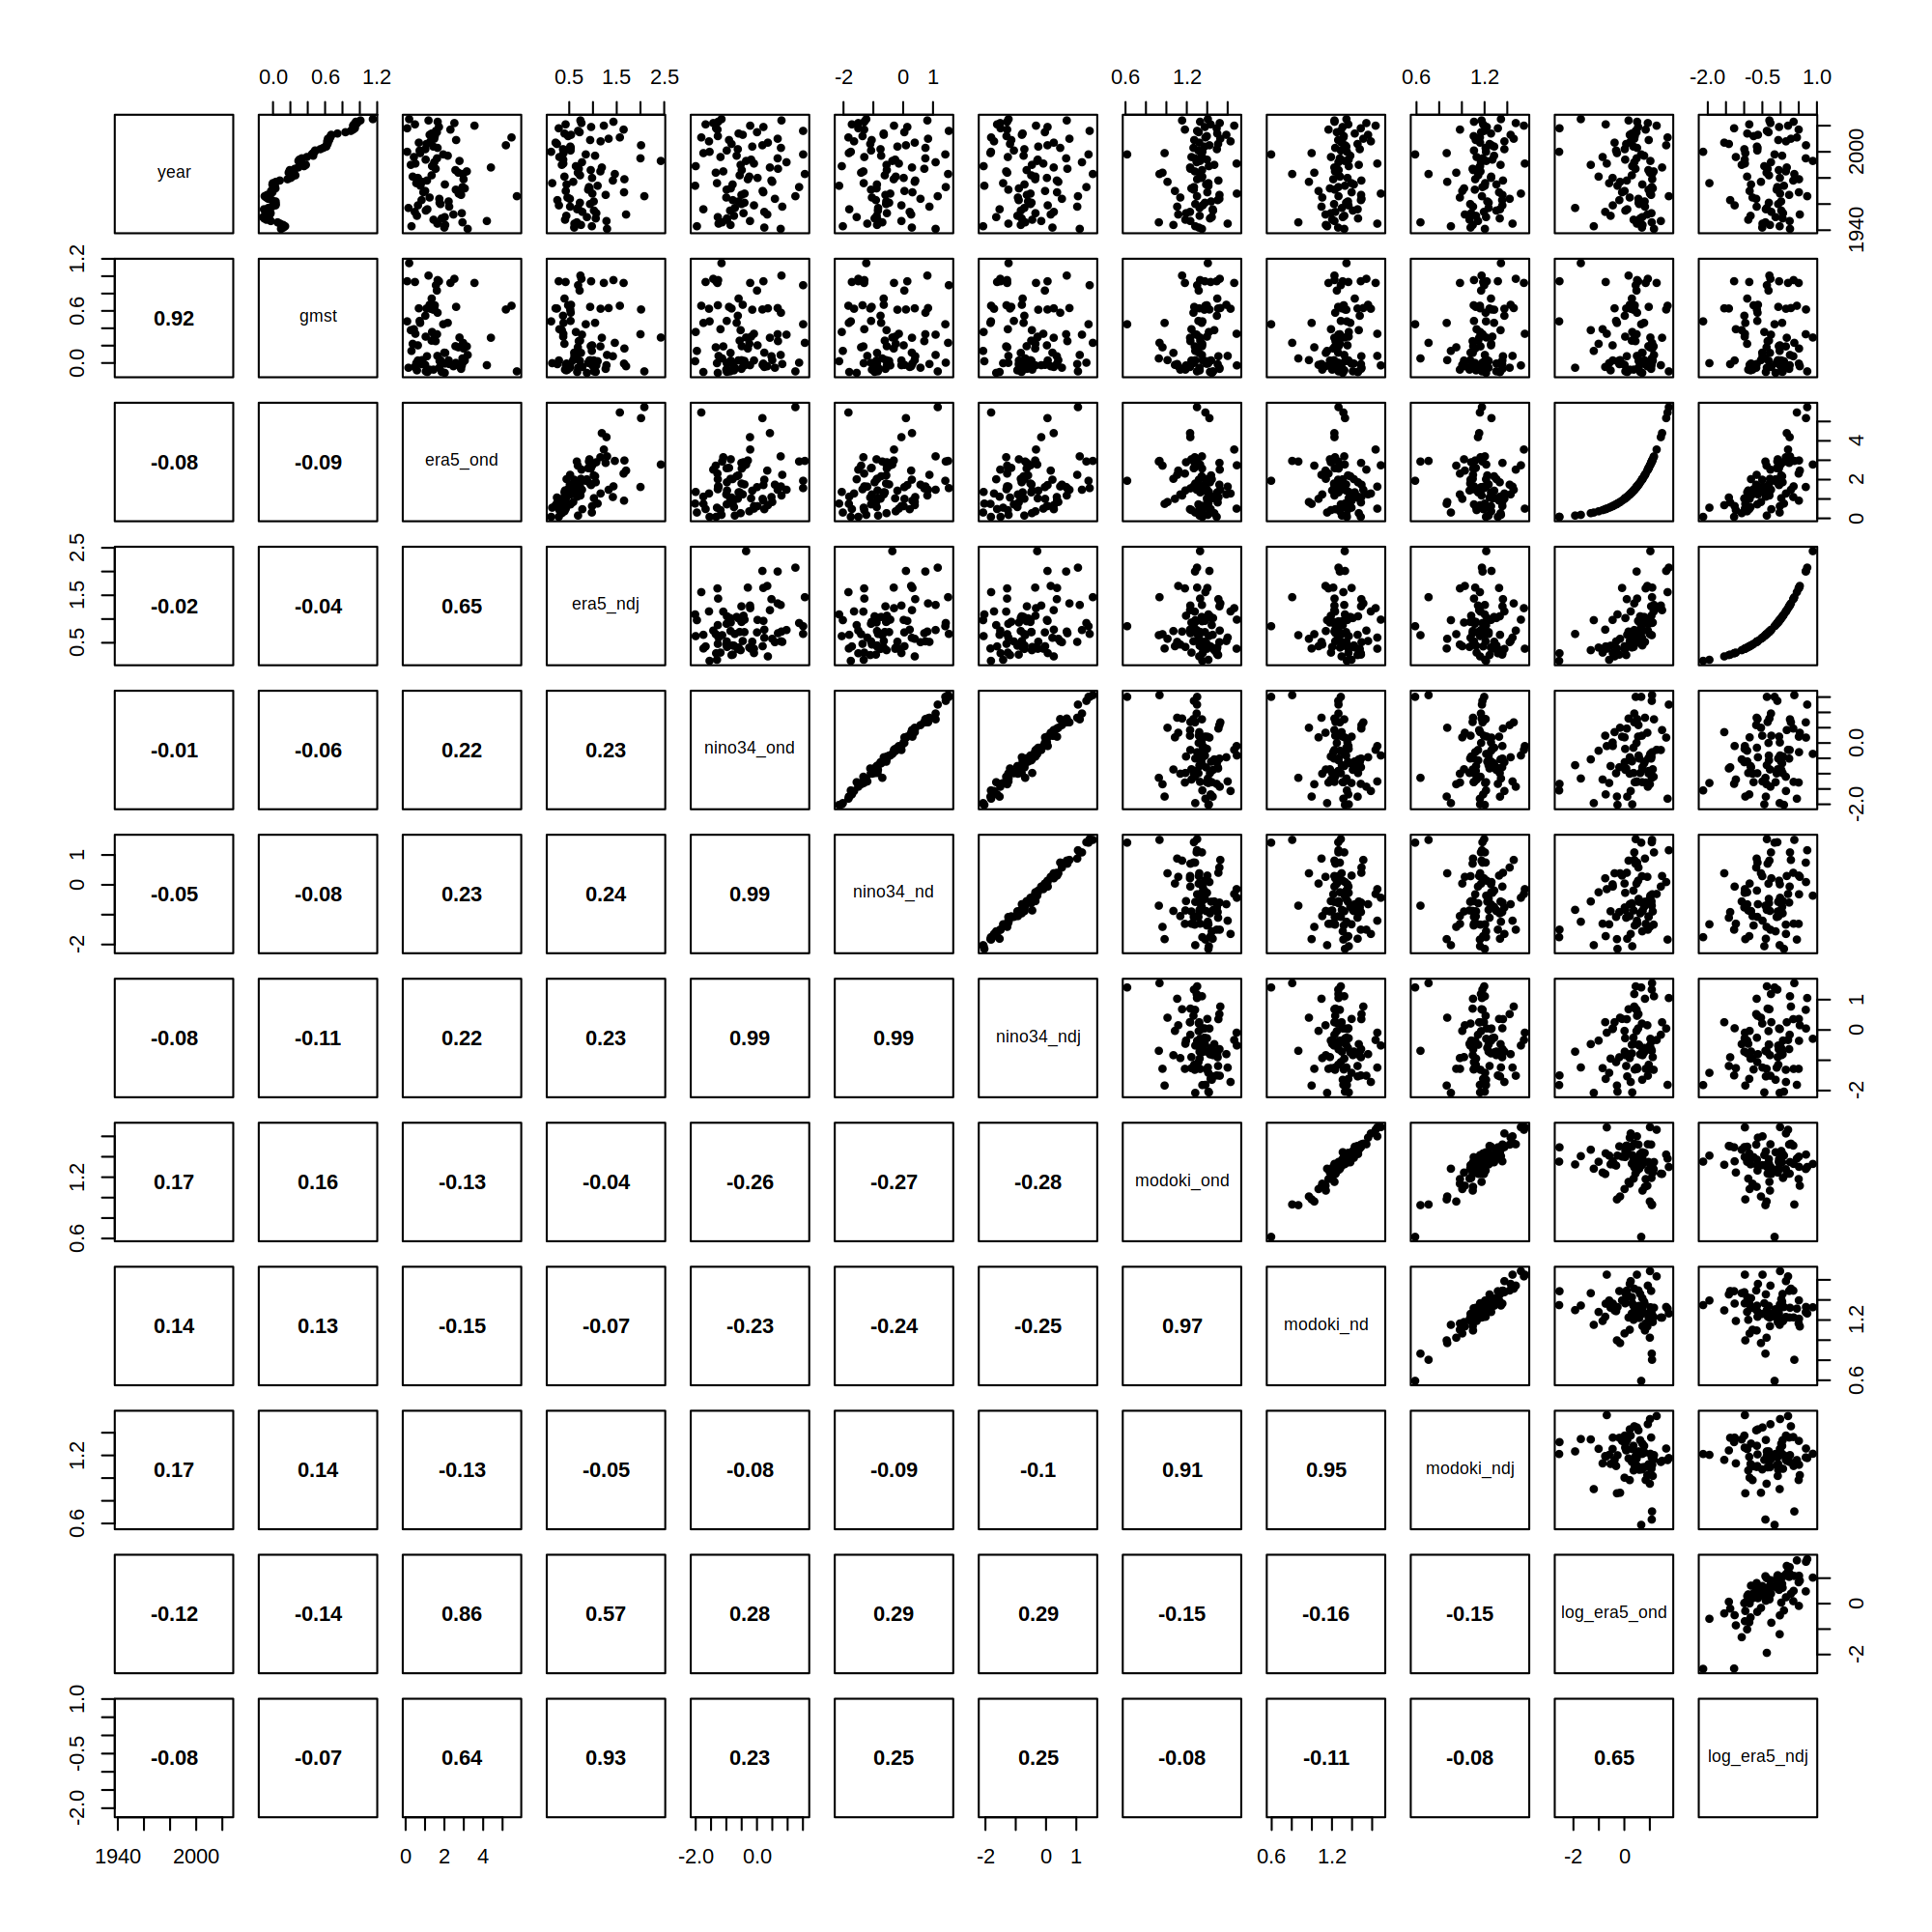

In [4]:
prep_window(c(1,1), h = 10, w = 10)

pairs(df, lower.panel = panel.cor)
# confirms that we should expect very similar results regardless of which Nino index we use

In [5]:
mdl_ond <- fit_ns("norm", "shift", df, varnm = "log_era5_ond", covnm = c("gmst"), lower = T)
mdl_ond_nino34 <- fit_ns("norm", "shift", df, varnm = "log_era5_ond", covnm = c("gmst", "nino34_nd"), lower = T)
mdl_ond_modoki <- fit_ns("norm", "shift", df, varnm = "log_era5_ond", covnm = c("gmst", "modoki_nd"), lower = T)
mdl_ond_both <- fit_ns("norm", "shift", df, varnm = "log_era5_ond", covnm = c("gmst", "nino34_nd", "modoki_nd"), lower = T)

mdl_ndj <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ndj", covnm = c("gmst"), lower = T, ev_year = NA, ev = NA)
mdl_ndj_nino34 <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ndj", covnm = c("gmst", "nino34_nd"), lower = T, ev_year = NA, ev = NA)
mdl_ndj_modoki <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ndj", covnm = c("gmst", "modoki_nd"), lower = T, ev_year = NA, ev = NA)
mdl_ndj_both <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ndj", covnm = c("gmst", "nino34_nd", "modoki_nd"), lower = T, ev_year = NA, ev = NA)

In [6]:
mlist_ond <- list("GMST only" = mdl_ond, "GMST + Nino3.4" = mdl_ond_nino34, "GMST + Modoki" = mdl_ond_modoki, "GMST + Nino3.4 + Modoki" = mdl_ond_both)
mlist_ndj <- list("GMST only" = mdl_ndj, "GMST + Nino3.4" = mdl_ndj_nino34, "GMST + Modoki" = mdl_ndj_modoki, "GMST + Nino3.4 + Modoki" = mdl_ndj_both)

In [7]:
round(sapply(mlist_ond, function(mdl) c(aic(mdl), rsquared(mdl))), 3)
round(sapply(mlist_ndj, function(mdl) c(aic(mdl), rsquared(mdl))), 3)

# in both cases, GMST + Nino3.4 is the best model. Including both Nino3.4 and Modoki explains slightly more variance (r2) but not enough to justify the additional parameter.

GMST only GMST + Nino3.4 GMST + Modoki GMST + Nino3.4 + Modoki
       219.759   214.567        219.996       215.974                
r2       0.021     0.100          0.041         0.107                
r2.adj   0.009     0.078          0.018         0.074

GMST only GMST + Nino3.4 GMST + Modoki GMST + Nino3.4 + Modoki
       160.956   157.795        162.053       159.587                
r2       0.005     0.064          0.016         0.067                
r2.adj  -0.007     0.041         -0.009         0.032

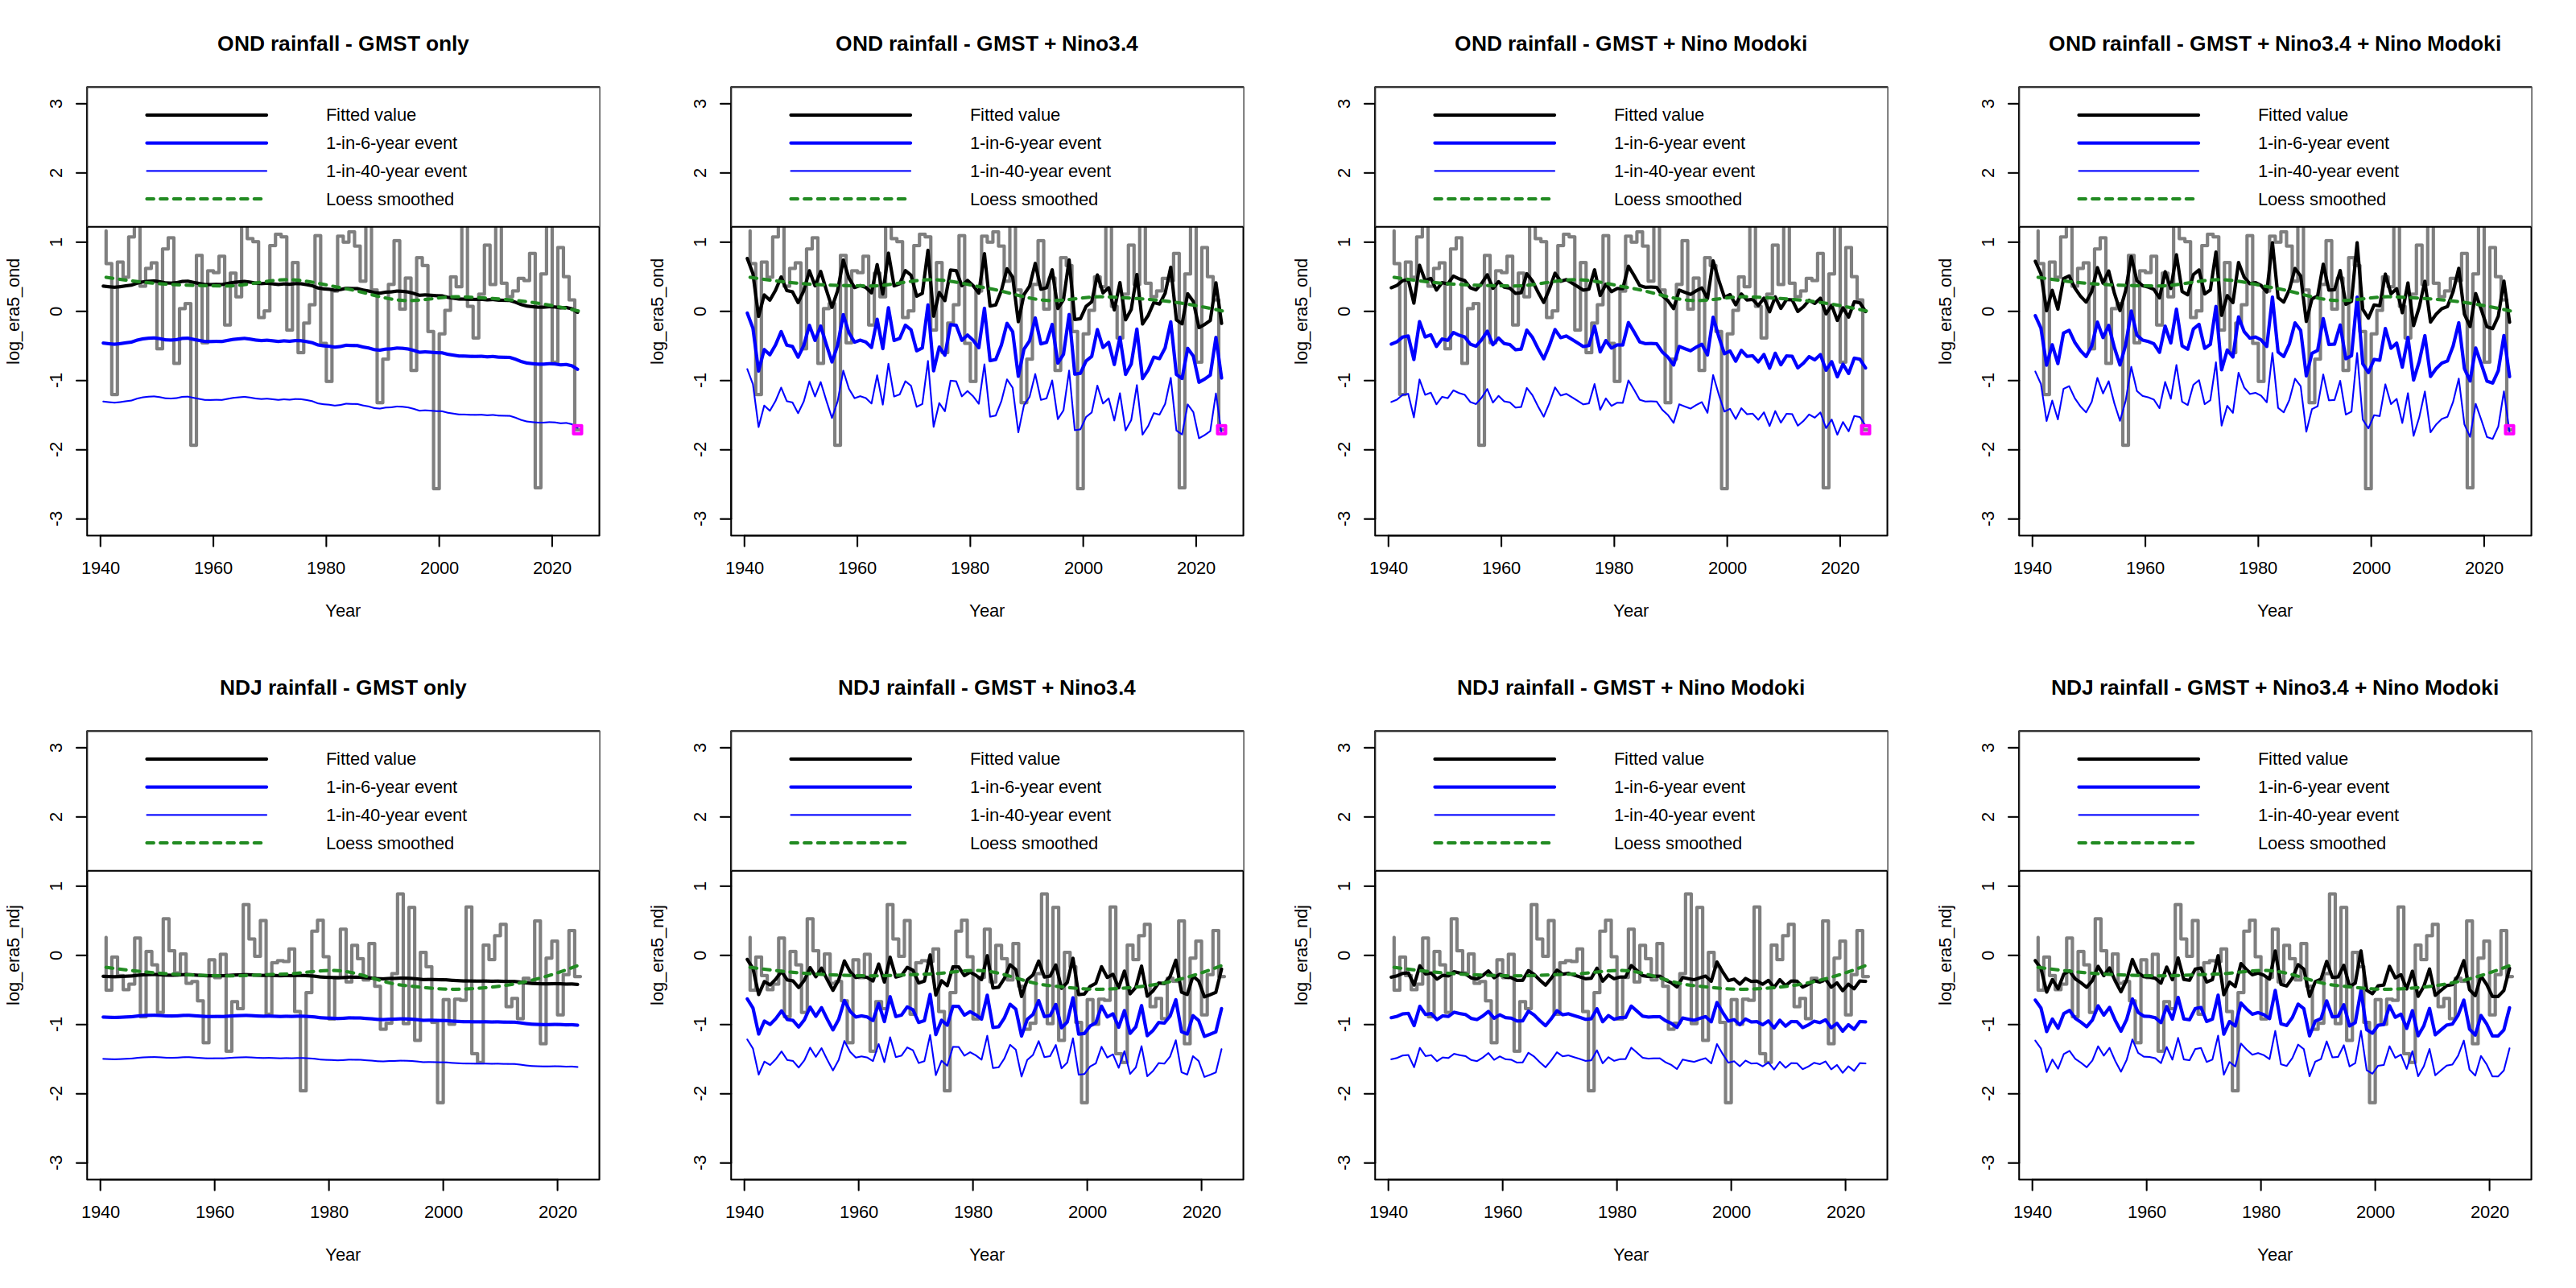

In [8]:
prep_window(c(2,4))
ylim <- c(-3,3)
plot_trend(mdl_ond, add_loess = T, main = "OND rainfall - GMST only", ylim = ylim)
plot_trend(mdl_ond_nino34, add_loess = T, main = "OND rainfall - GMST + Nino3.4", ylim = ylim)
plot_trend(mdl_ond_modoki, add_loess = T, main = "OND rainfall - GMST + Nino Modoki", ylim = ylim)
plot_trend(mdl_ond_both, add_loess = T, main = "OND rainfall - GMST + Nino3.4 + Nino Modoki", ylim = ylim)

plot_trend(mdl_ndj, add_loess = T, main = "NDJ rainfall - GMST only", ylim = ylim, ev = -99)
plot_trend(mdl_ndj_nino34, add_loess = T, main = "NDJ rainfall - GMST + Nino3.4", ylim = ylim, ev = -99)
plot_trend(mdl_ndj_modoki, add_loess = T, main = "NDJ rainfall - GMST + Nino Modoki", ylim = ylim, ev = -99)
plot_trend(mdl_ndj_both, add_loess = T, main = "NDJ rainfall - GMST + Nino3.4 + Nino Modoki", ylim = ylim, ev = -99)

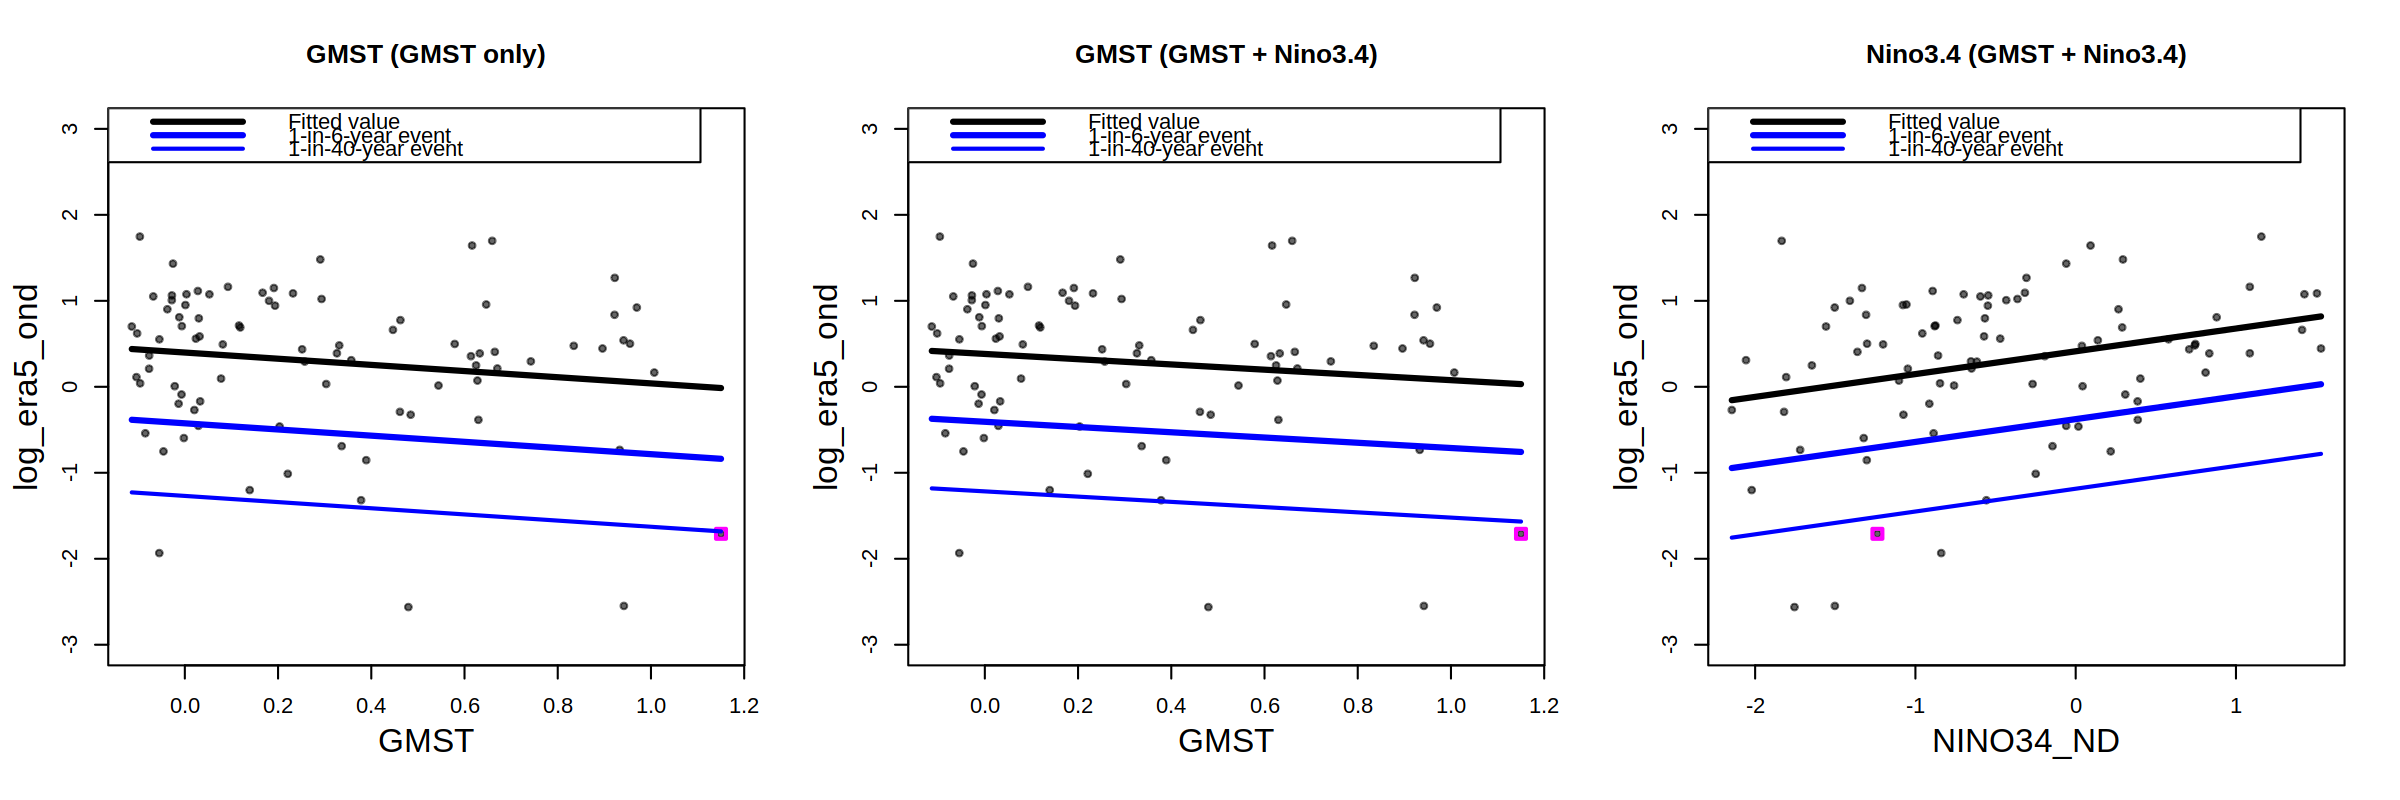

In [107]:
prep_window(c(1,3))
ylim <- c(-3,3)

plot_covtrend(mdl_ond, xcov = "gmst", ylim = ylim, main = "GMST (GMST only)")
plot_covtrend(mdl_ond_nino34, xcov = "gmst", ylim = ylim, main = "GMST (GMST + Nino3.4)")
plot_covtrend(mdl_ond_nino34, xcov = "nino34_nd", ylim = ylim, main = "Nino3.4 (GMST + Nino3.4)")

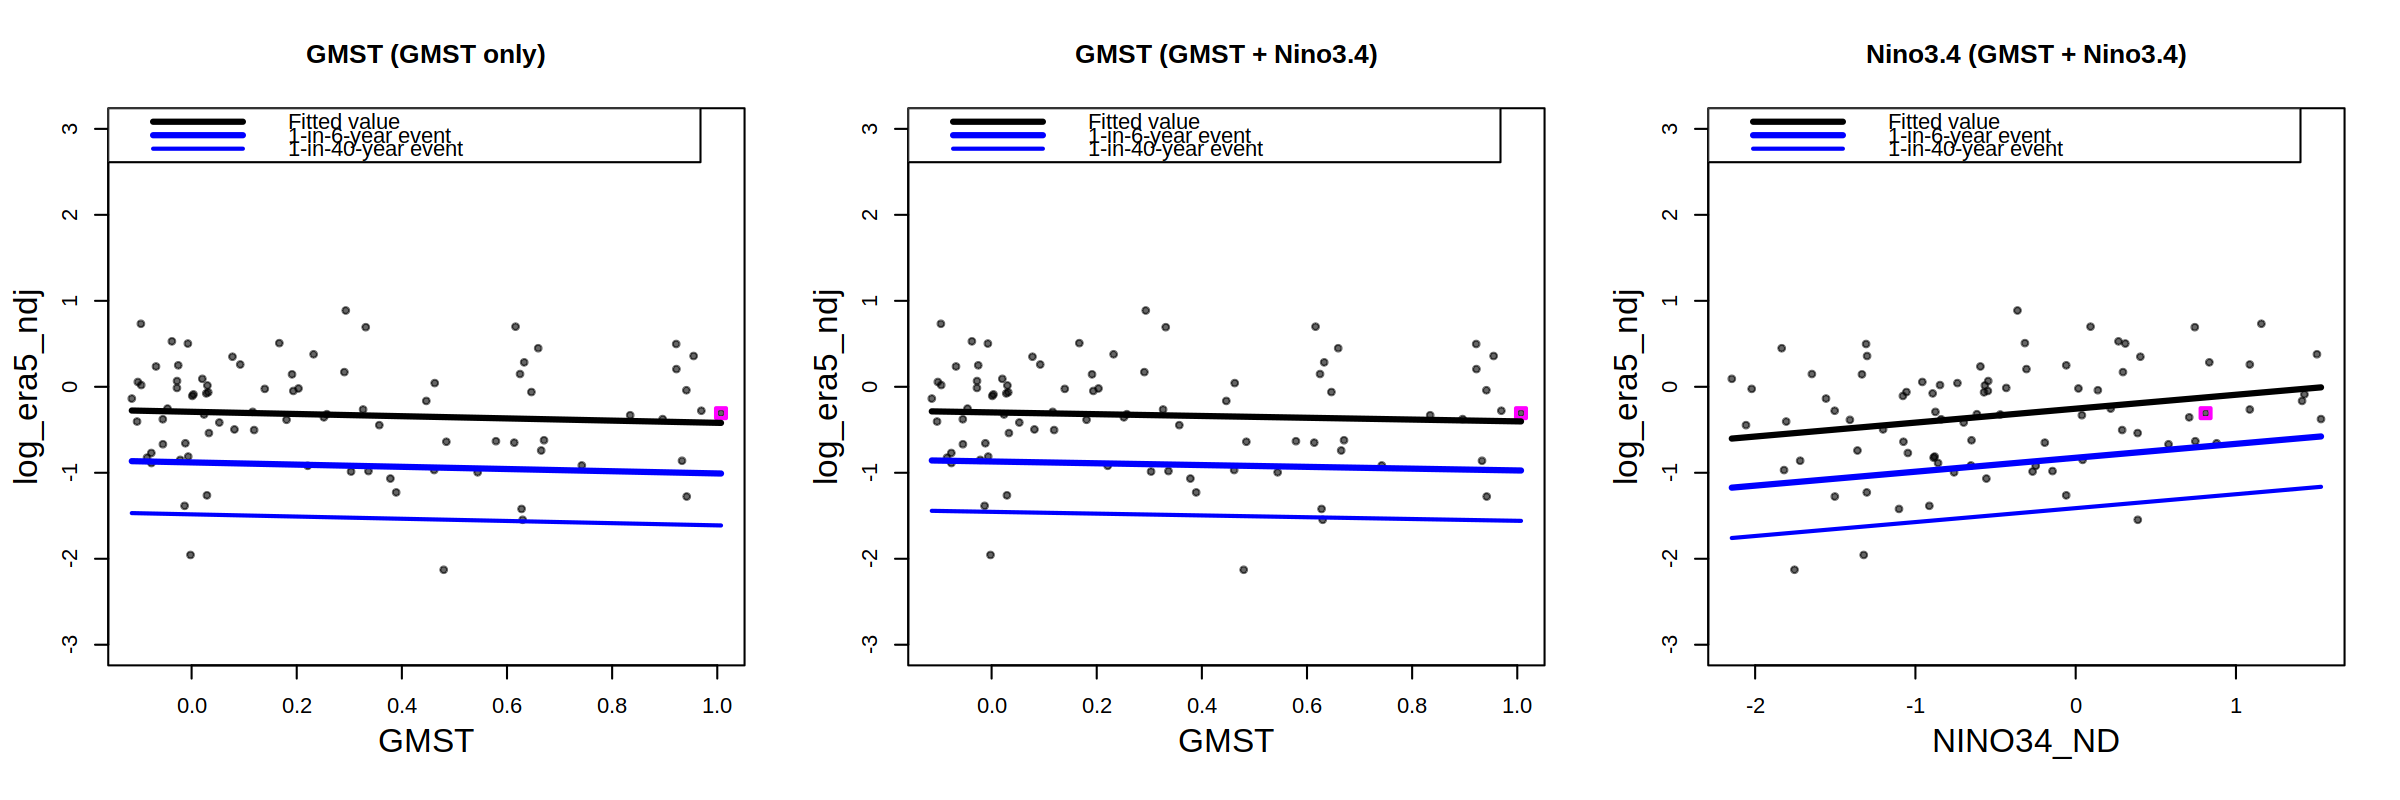

In [61]:
prep_window(c(1,3))
ylim <- c(-3,3)

plot_covtrend(mdl_ndj, xcov = "gmst", ylim = ylim, main = "GMST (GMST only)")
plot_covtrend(mdl_ndj_nino34, xcov = "gmst", ylim = ylim, main = "GMST (GMST + Nino3.4)")
plot_covtrend(mdl_ndj_nino34, xcov = "nino34_nd", ylim = ylim, main = "Nino3.4 (GMST + Nino3.4)")

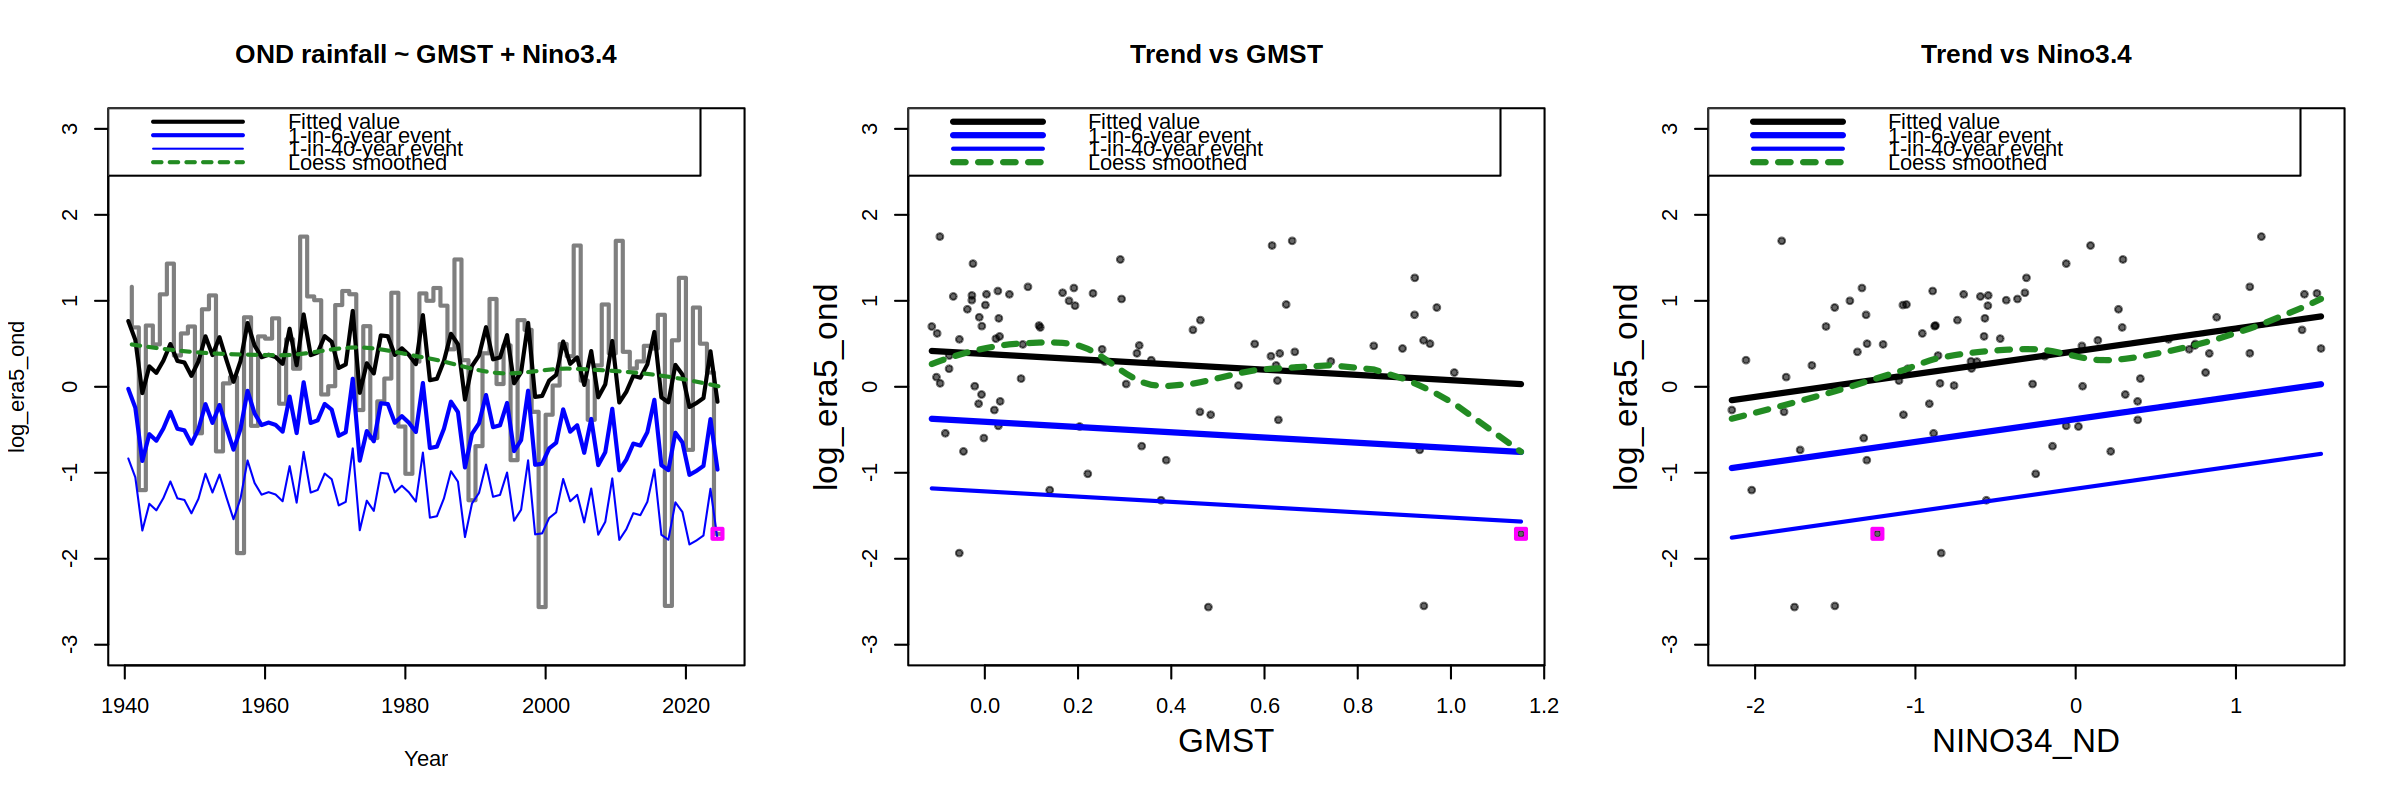

In [47]:
prep_window(c(1,3))
ylim <- c(-3,3)

plot_trend(mdl_ond_nino34, add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)

plot_covtrend(mdl_ond_nino34, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)
# lines(df$gmst[o], ns_pars(mdl2, fixed_cov = data.frame(gmst = df[o,"gmst"], "nino34_nd" = mean(df$nino34_nd)))$loc, col = "red")
plot_covtrend(mdl_ond_nino34, xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)

In [ ]:
cov_2024 = df[df$year == 2024, c("gmst", "nino34_nd"), drop = F]
cov_pi = rbind("pi" = cov_2024 - c(1.3, 0),
               "neutral" = c(cov_2024$gmst, 0))

boot_res <- boot_ci(mdl_ond_nino34, cov_f = cov_2024, cov_cf = cov_pi)

In [68]:
round((exp(boot_res["dI_abs_pi",]) - 1) * 100, 2)

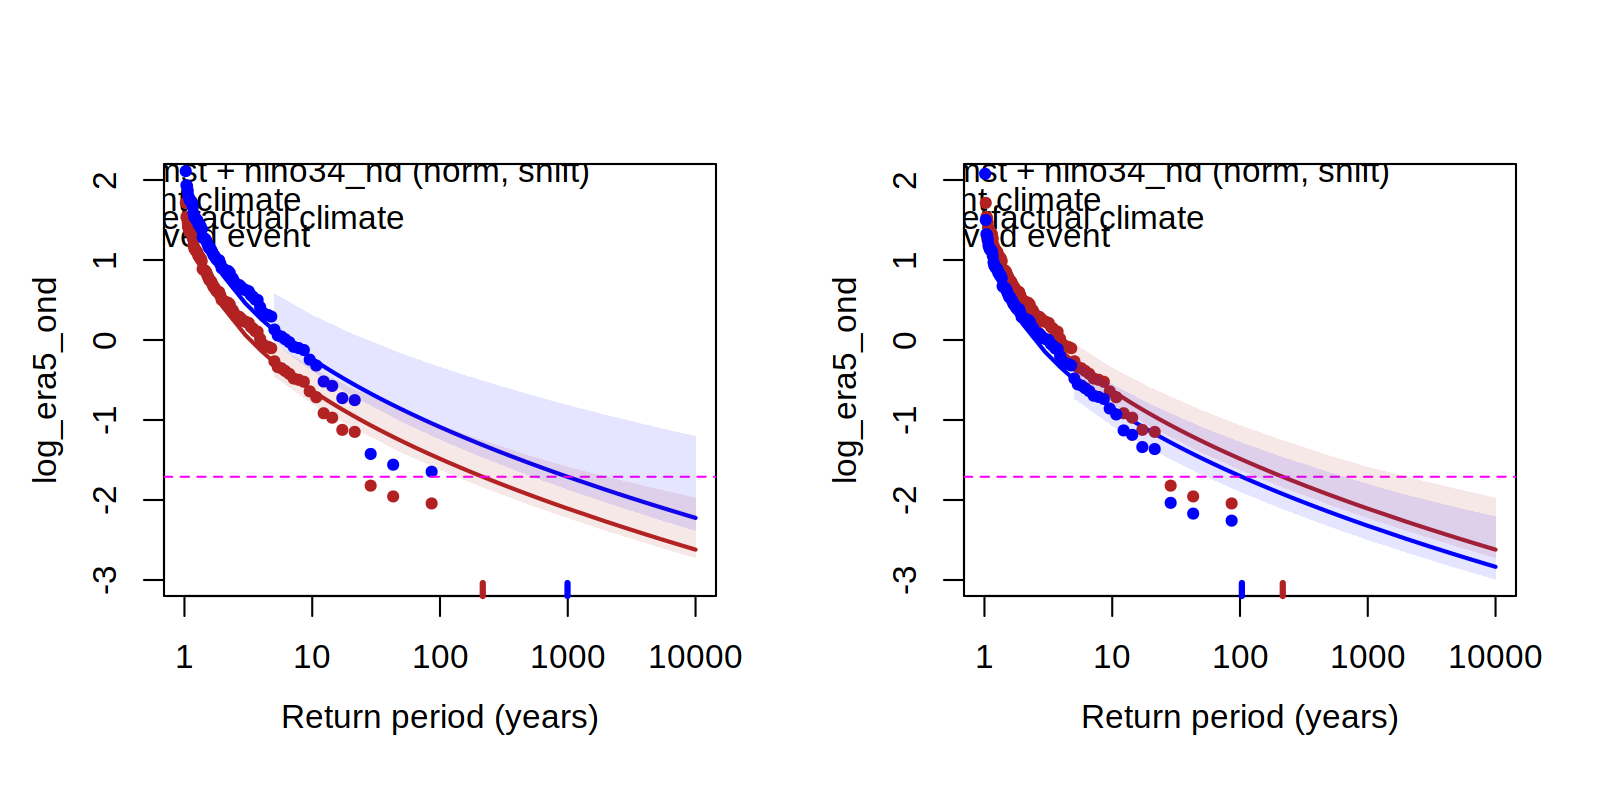

In [107]:
prep_window(c(1,2))
ylim <- c(-3,3)

plot_returnlevels(mdl_ond_nino34, cov_f = cov_2024, cov_cf = cov_pi["pi",,drop = F], nsamp = 5)
plot_returnlevels(mdl_ond_nino34, cov_f = cov_2024, cov_cf = cov_pi["neutral",,drop = F], nsamp = 5)

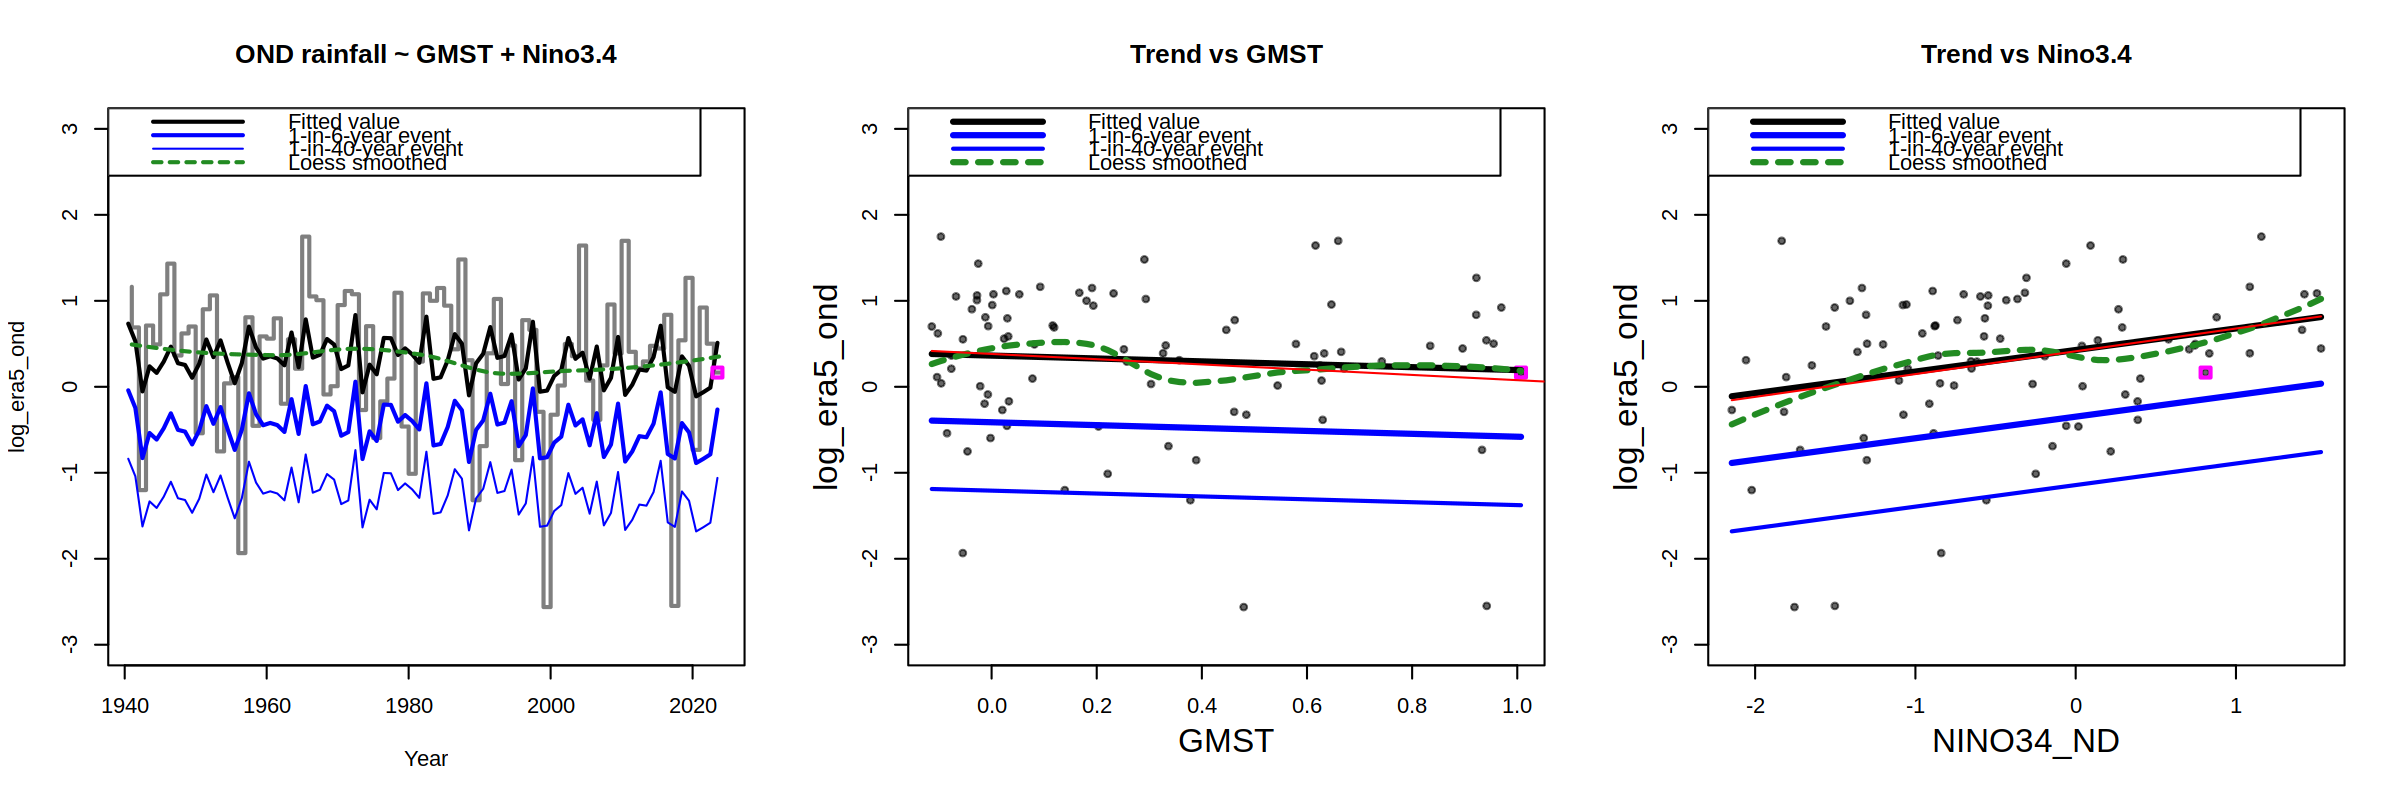

In [74]:
prep_window(c(1,3))
ylim <- c(-3,3)

plot_trend(mdl2, add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)

plot_covtrend(mdl2, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)
lines(df$gmst[o], ns_pars(mdl_ond_nino34, fixed_cov = data.frame(gmst = df[o,"gmst"], "nino34_nd" = mean(df$nino34_nd)))$loc, col = "red")

plot_covtrend(mdl2, xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)
lines(df$nino34_nd[order(df$nino34_nd)], ns_pars(mdl_ond_nino34, fixed_cov = data.frame(gmst = mean(df$gmst), "nino34_nd" = df$nino34_nd[order(df$nino34_nd)]))$loc, col = "red")


In [71]:
boot_res2 <- boot_ci(mdl2, cov_f = cov_2024, cov_cf = cov_pi)

In [80]:
round((exp(boot_res["dI_abs_pi",]) - 1) * 100, 2)
round((exp(boot_res2["dI_abs_pi",]) - 1) * 100, 2)
round((exp(boot_1970["dI_abs_pi",]) - 1) * 100, 2)

est   2.5%  97.5% 
 -8.43 -31.08   5.46

est   2.5%  97.5% 
-25.06 -83.62  50.72

est   2.5%  97.5% 
 -8.44 -43.20   7.17

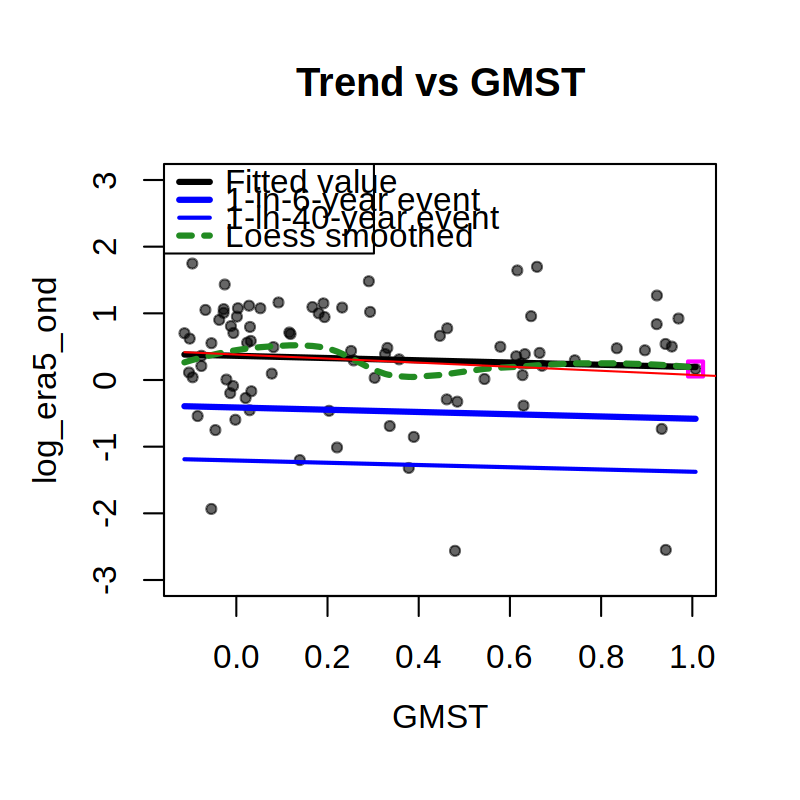

In [46]:
prep_window(c(1,1))

mdl2 <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ond", covnm = c("gmst", "nino34_nd"), lower = T, ev_year = NA, ev = NA)

plot_covtrend(mdl2, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)

lines(df$gmst[o], ns_pars(mdl_ond_nino34, fixed_cov = data.frame(gmst = df[o,"gmst"], "nino34_nd" = mean(df$nino34_nd)))$loc, col = "red")

In [118]:
mdl_notlogged <- fit_ns("norm", "shift", df, varnm = "era5_ond", covnm = c("gmst", "nino34_nd"), lower = T)

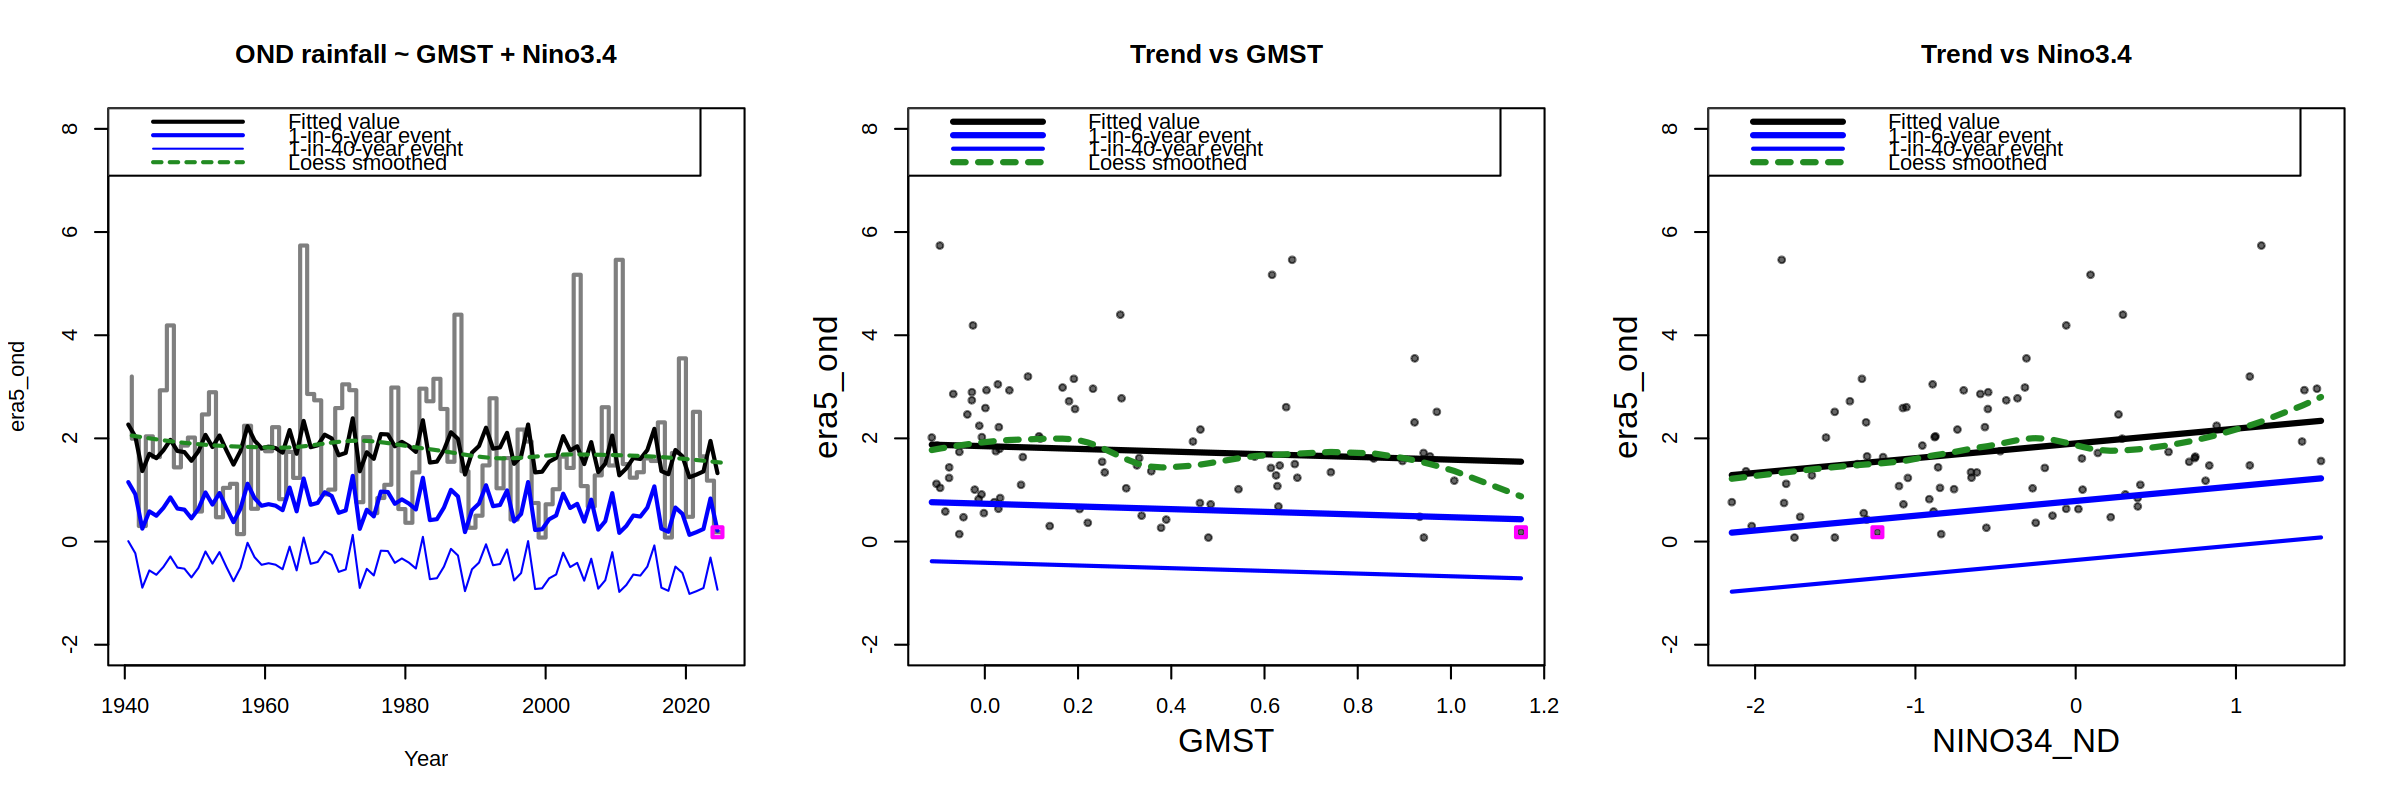

In [116]:
prep_window(c(1,3))
ylim <- c(-2,8)

plot_trend(mdl_notlogged, add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)

plot_covtrend(mdl_notlogged, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)

plot_covtrend(mdl_notlogged, xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)


In [18]:
mdl2 <- fit_ns("norm", "shift", df[df$year <= 2024,], varnm = "log_era5_ond", covnm = c("gmst", "nino34_nd"), lower = T, ev_year = NA, ev = NA)


In [79]:
mdl_ond_nino34_1970 <- fit_ns("norm", "shift", df[df$year >= 1970,], varnm = "log_era5_ond", covnm = c("gmst", "nino34_nd"), lower = T)
boot_1970 <- boot_ci(mdl_ond_nino34_1970, cov_f = cov_2024, cov_cf = cov_pi)

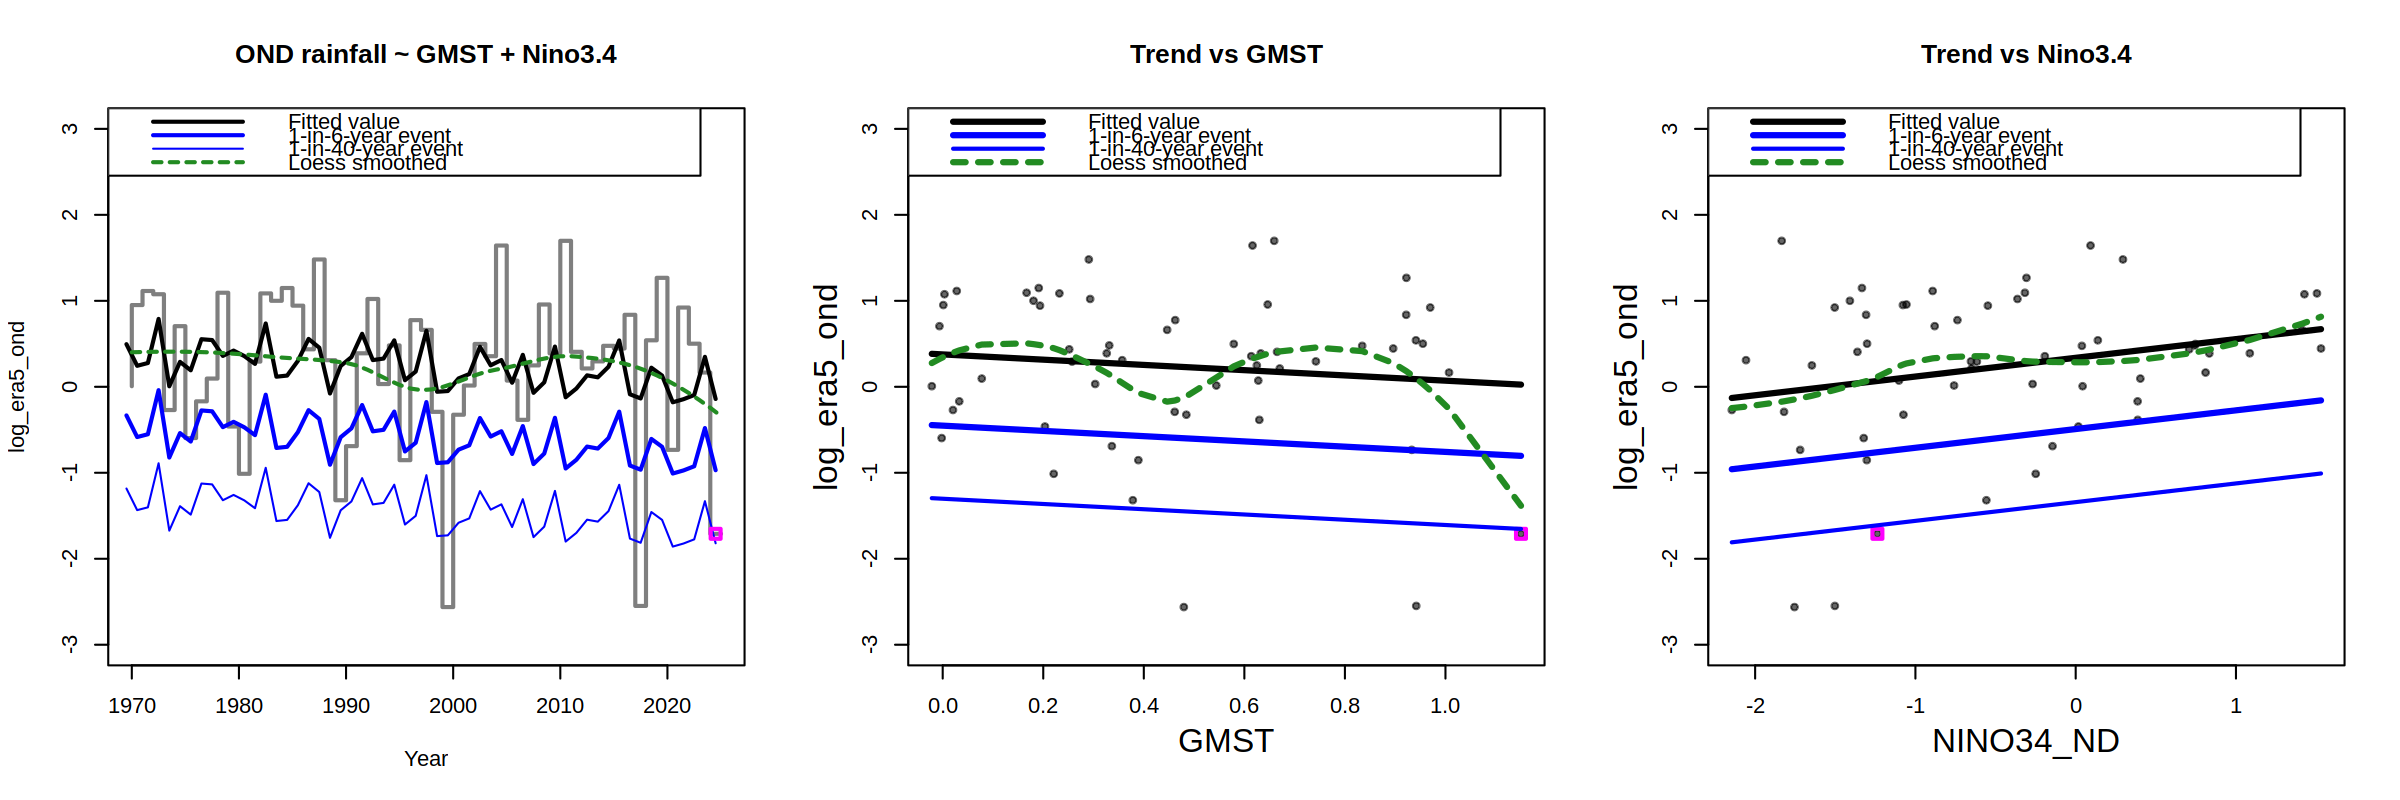

In [78]:
prep_window(c(1,3))
ylim <- c(-3,3)

plot_trend(mdl_ond_nino34_1970, add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)

plot_covtrend(mdl_ond_nino34_1970, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)

plot_covtrend(mdl_ond_nino34_1970, xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)


# Trends in ERA5-land HDWI

In [124]:
df <- merge(merge(read.table("ts/gmst.dat", col.names = c("year", "gmst")),
                  read.csv("ts/nino_nd.csv", col.names = c("year", "nino34_nd"))),
            read.csv("ts/era5-land_hdwi-janmax.csv", col.names = c("year", "hdwi")))

cov_2024 = df[df$year == 2024, c("gmst", "nino34_nd"), drop = F]
cov_pi = rbind("pi" = cov_2024 - c(1.3, 0),
               "neutral" = c(cov_2024$gmst, 0))

In [91]:
prep_window(c(1,1), h = 6, w = 6)

pairs(df, lower.panel = panel.cor)

In [105]:
mlist_hdwi <- list("gmst" = fit_ns("norm", "shift", df, varnm = "hdwi", covnm = c("gmst"), lower = F),
                   "gmst + nino3.4" = fit_ns("norm", "shift", df, varnm = "hdwi", covnm = c("gmst", "nino34_nd"), lower = F))

round(sapply(mlist_hdwi, function(mdl) c(aic(mdl), rsquared(mdl))), 3)

gmst    gmst + nino3.4
       293.117 294.386       
r2       0.100   0.112       
r2.adj   0.083   0.078

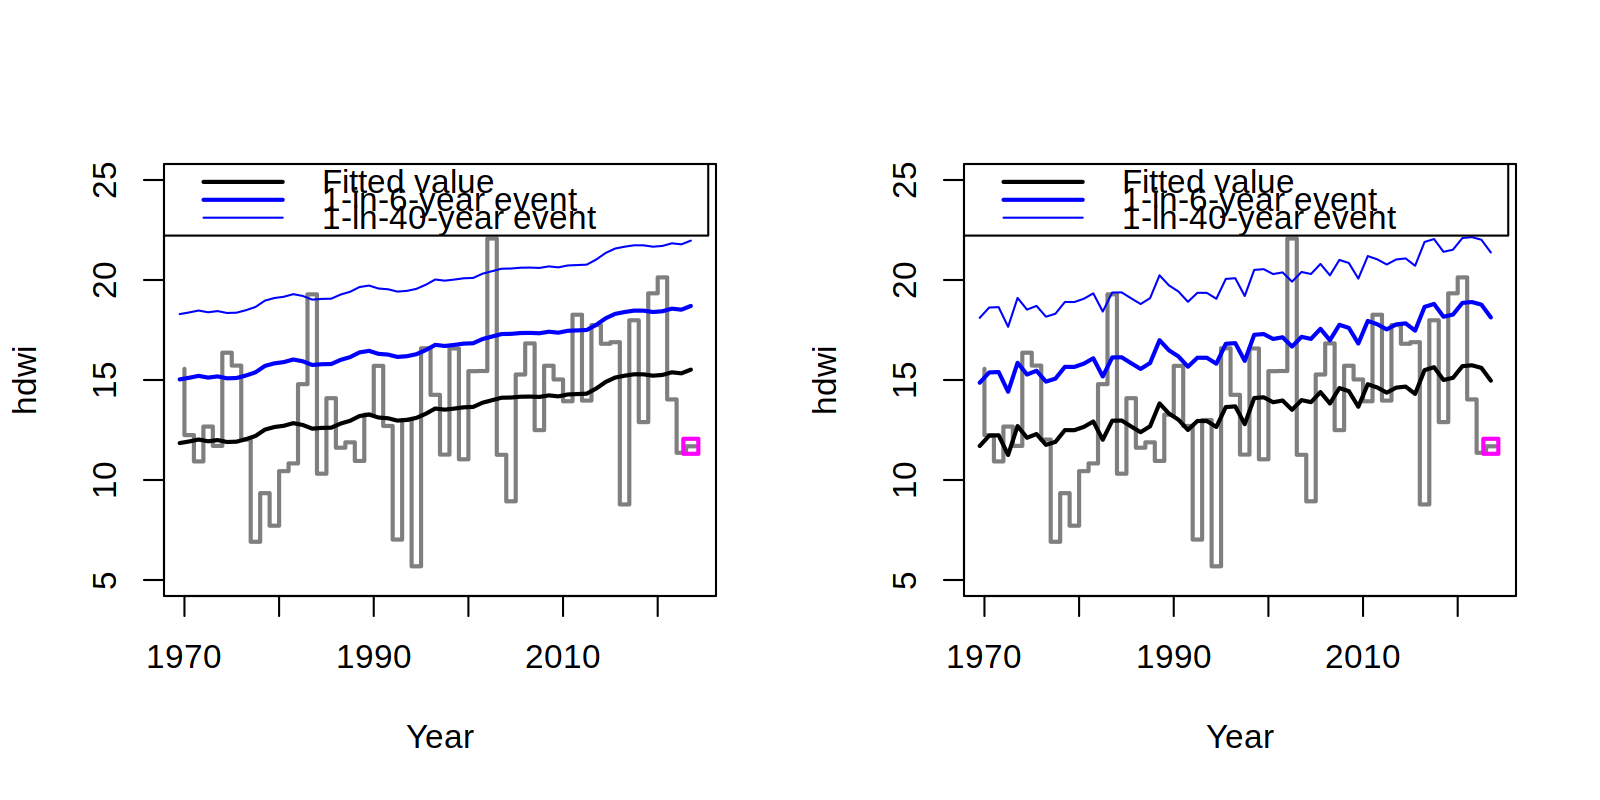

In [103]:
prep_window(c(1,2))

plot_trend(mlist_hdwi[[1]])
plot_trend(mlist_hdwi[[2]])

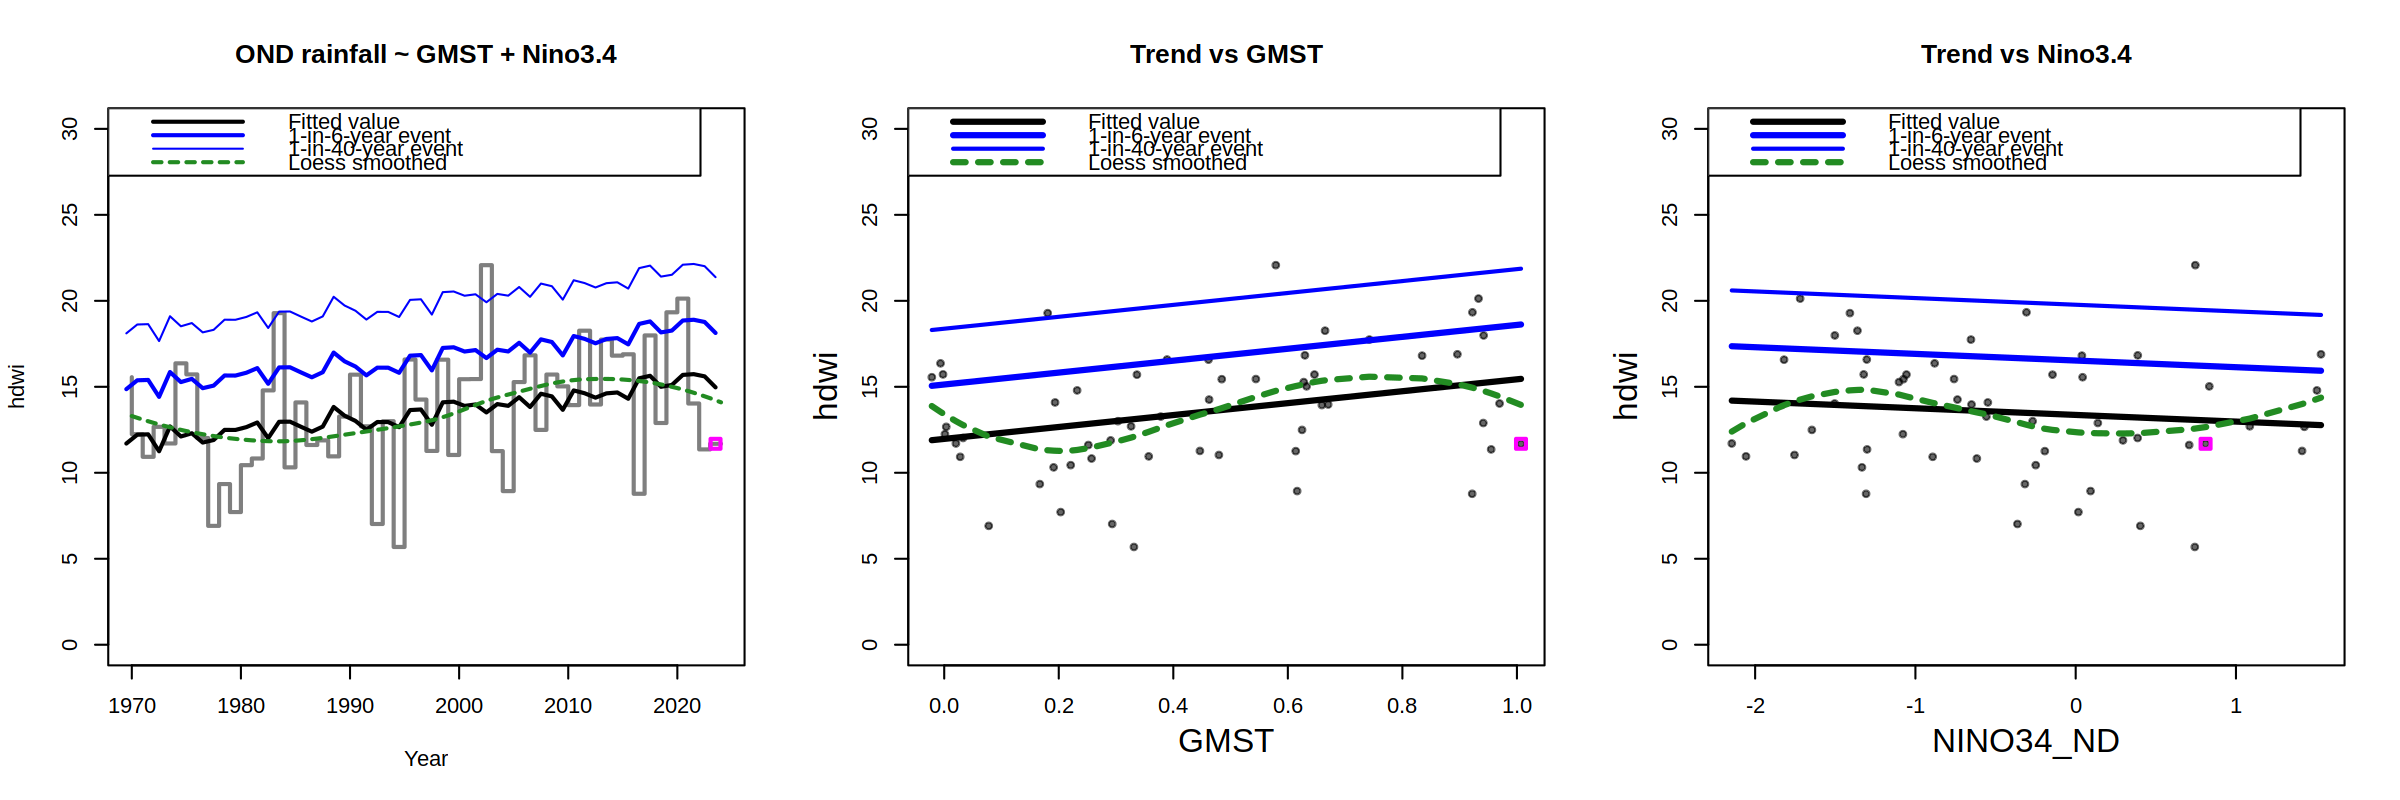

In [119]:
prep_window(c(1,3))

ylim = c(0,30)

plot_trend(mlist_hdwi[[2]], add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)
plot_covtrend(mlist_hdwi[[2]], xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)
plot_covtrend(mlist_hdwi[[2]], xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)

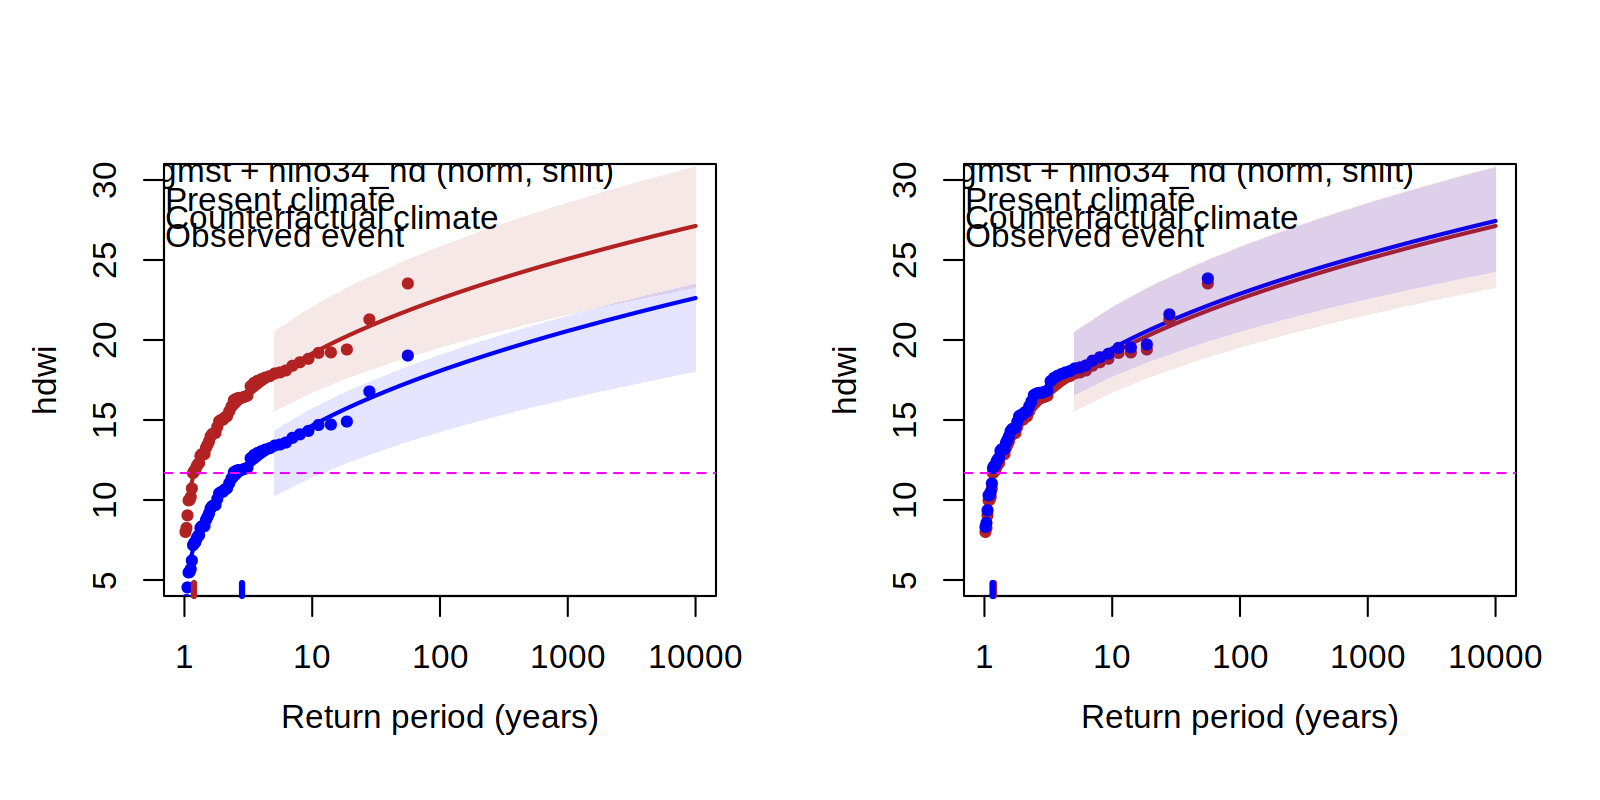

In [123]:
prep_window(c(1,2))
ylim = c(0,30)

plot_returnlevels(mlist_hdwi[[2]], cov_f = cov_2024, cov_cf = cov_pi["pi",,drop = F], nsamp = 5)
plot_returnlevels(mlist_hdwi[[2]], cov_f = cov_2024, cov_cf = cov_pi["neutral",,drop = F], nsamp = 5)

In [125]:
df <- merge(merge(read.table("ts/gmst.dat", col.names = c("year", "gmst")),
                  read.csv("ts/nino_nd.csv", col.names = c("year", "nino34_nd"))),
            read.csv("ts/era5-land_hdwi-janmean.csv", col.names = c("year", "hdwi")))

cov_2024 = df[df$year == 2024, c("gmst", "nino34_nd"), drop = F]
cov_pi = rbind("pi" = cov_2024 - c(1.3, 0),
               "neutral" = c(cov_2024$gmst, 0))

In [128]:
mdl_hdwimean <- fit_ns("norm", "shift", df, varnm = "hdwi", covnm = c("gmst", "nino34_nd"), lower = F)

rsquared(mdl_hdwimean)*100

r2   r2.adj 
16.33254 13.11456

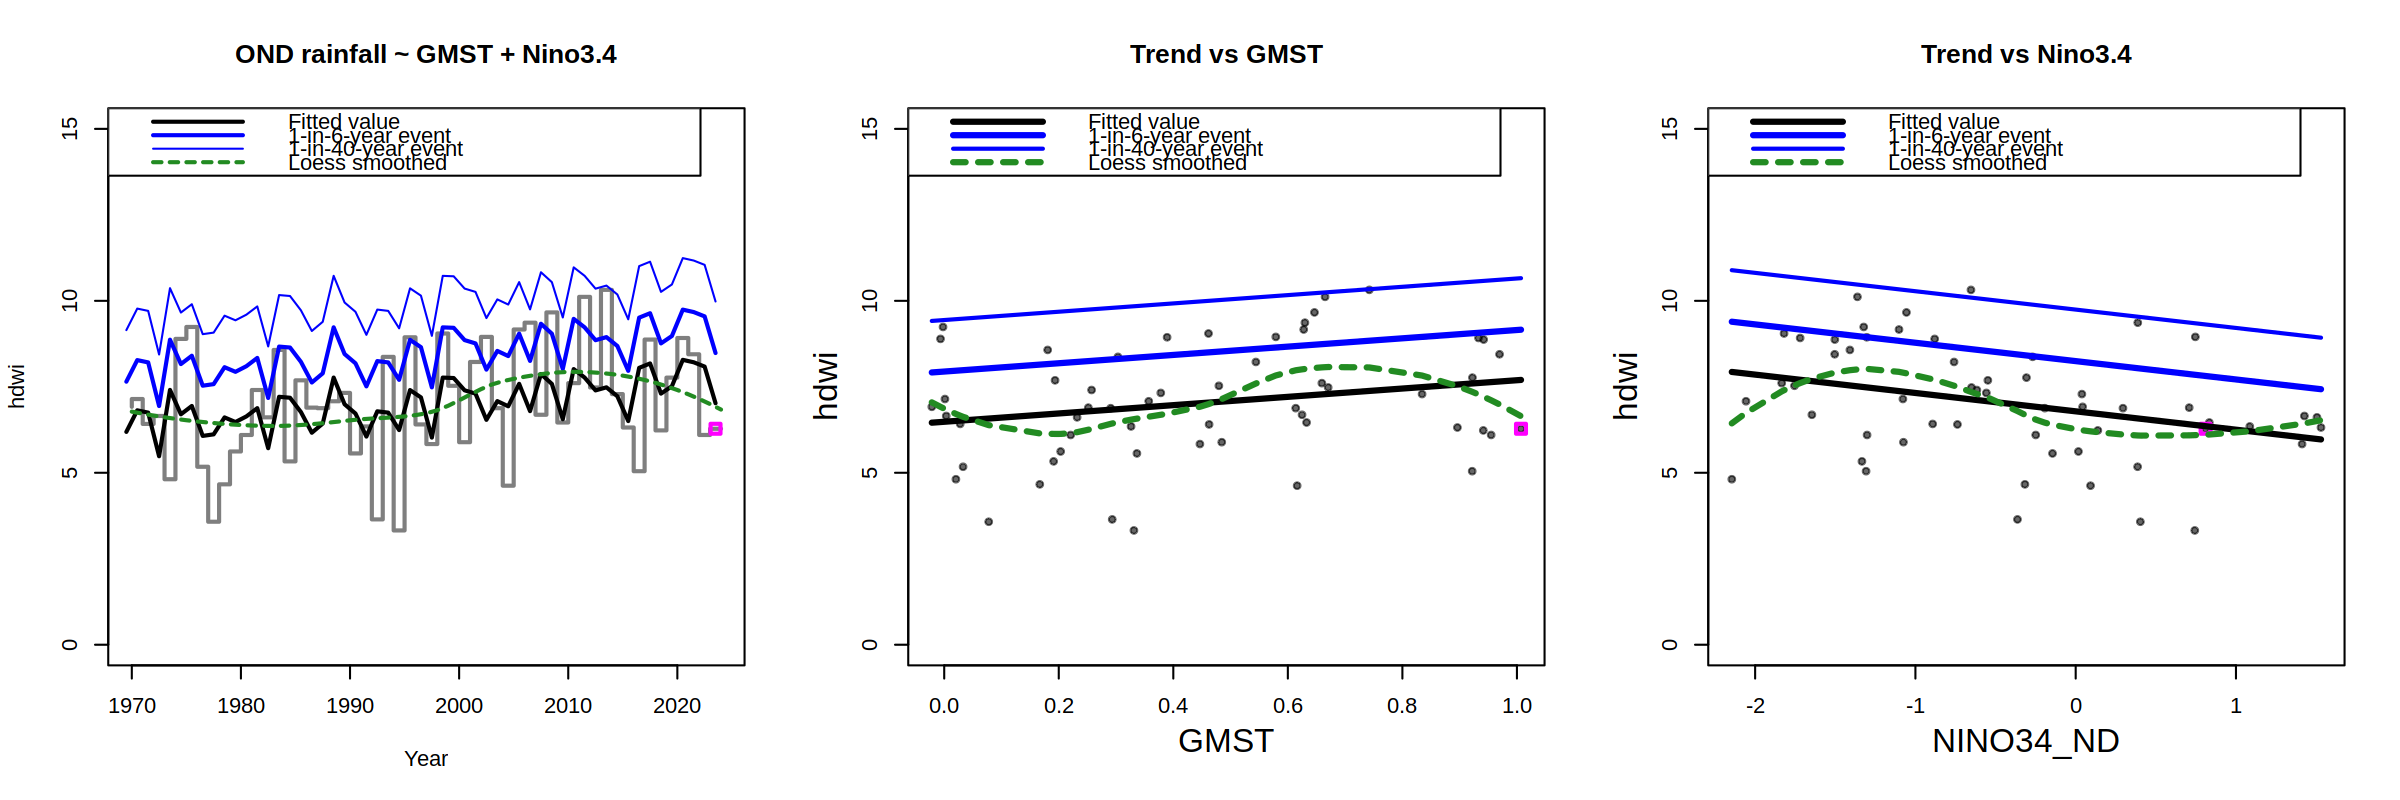

In [130]:
prep_window(c(1,3))

ylim = c(0,15)

plot_trend(mdl_hdwimean, add_loess = T, main = "OND rainfall ~ GMST + Nino3.4", ylim = ylim)
plot_covtrend(mdl_hdwimean, xcov = "gmst", ylim = ylim, main = "Trend vs GMST", add_loess = T)
plot_covtrend(mdl_hdwimean, xcov = "nino34_nd", ylim = ylim, main = "Trend vs Nino3.4", add_loess = T)

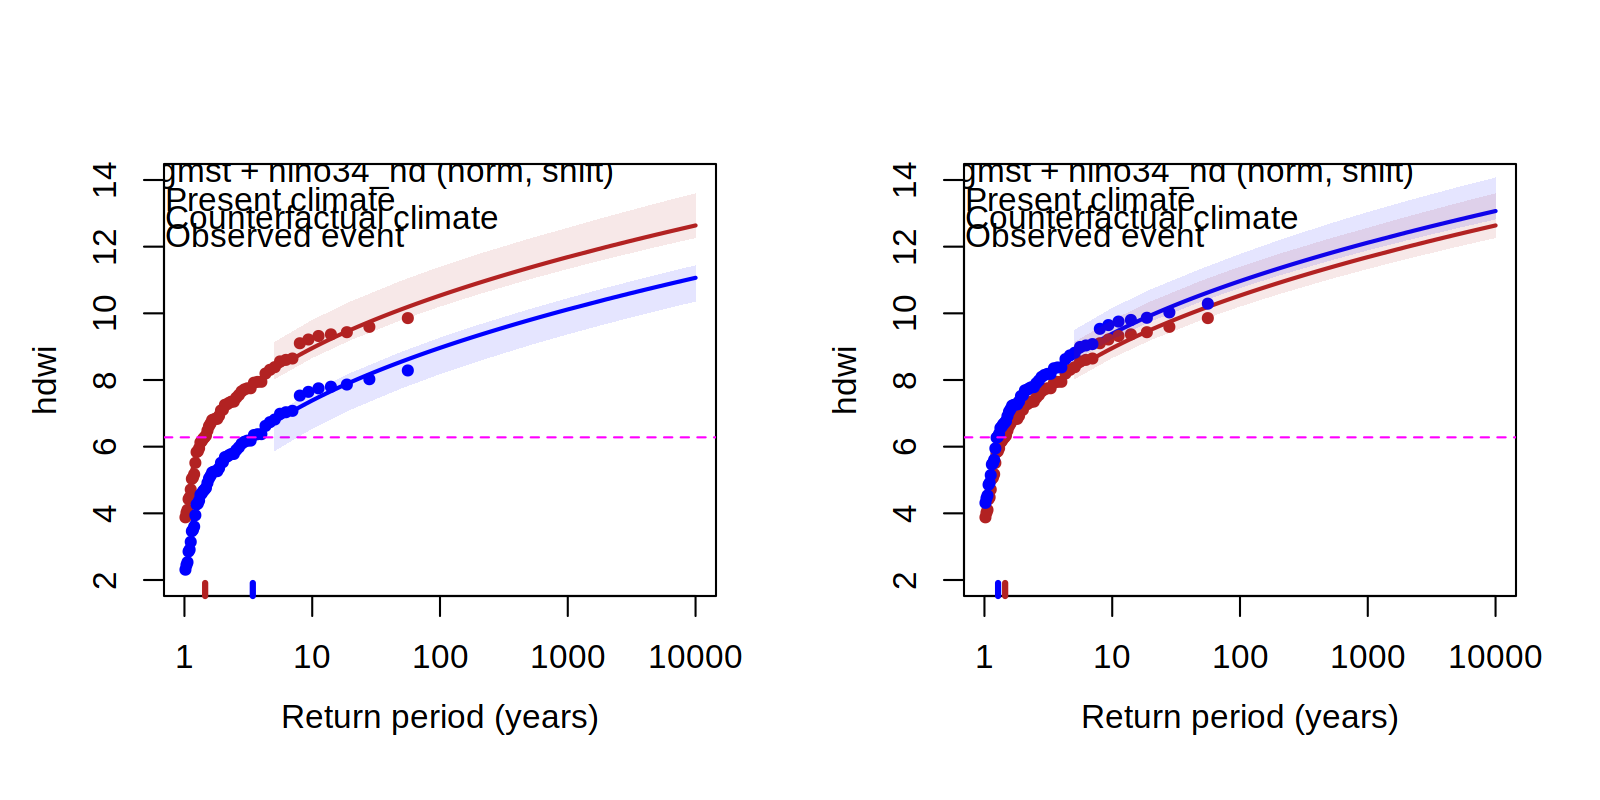

In [131]:
prep_window(c(1,2))
ylim = c(0,15)

plot_returnlevels(mdl_hdwimean, cov_f = cov_2024, cov_cf = cov_pi["pi",,drop = F], nsamp = 5)
plot_returnlevels(mdl_hdwimean, cov_f = cov_2024, cov_cf = cov_pi["neutral",,drop = F], nsamp = 5)

In [153]:
df <- merge(merge(read.table("ts/gmst.dat", col.names = c("year", "gmst")),
                  read.csv("ts/nino_ond.csv", col.names = c("year", "nino34_nd"))),
            read.csv("ts/era5_spei-jan.csv"))
df <- df[df$year > 1940,]

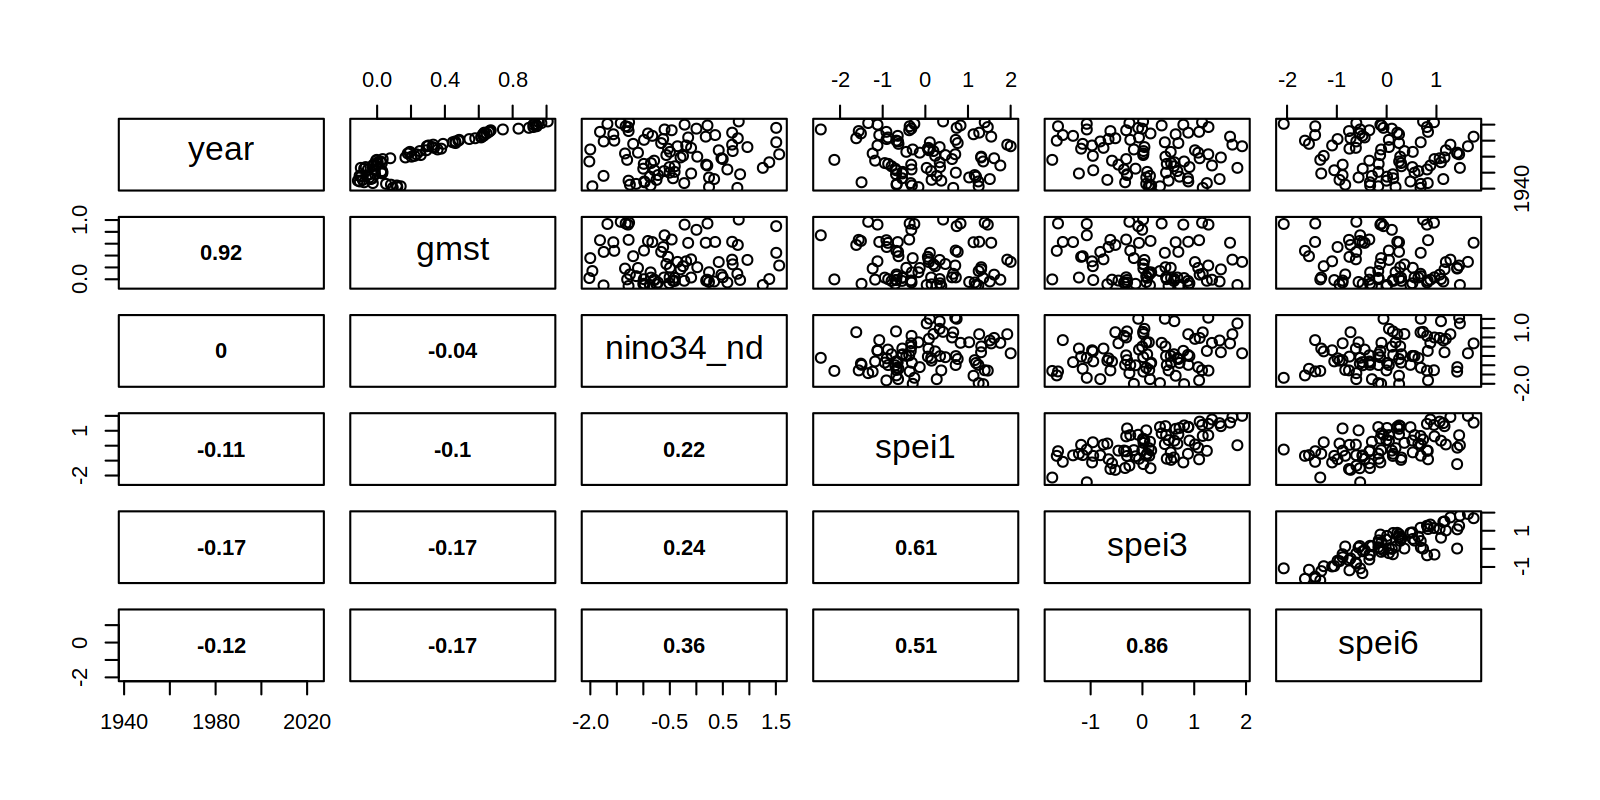

In [154]:
pairs(df, lower.panel = panel.cor)

In [155]:
mlist <- list("spei1" = fit_ns("norm", "shift", df, varnm = "spei1", covnm = c("gmst", "nino34_nd"), lower = T, ev = NA),
              "spei3" = fit_ns("norm", "shift", df, varnm = "spei3", covnm = c("gmst", "nino34_nd"), lower = T, ev = NA),
              "spei6" = fit_ns("norm", "shift", df, varnm = "spei6", covnm = c("gmst", "nino34_nd"), lower = T, ev = NA))

In [156]:
sapply(mlist, function(mdl) c(aic(mdl), rsquared(mdl)*100))

spei1      spei3      spei6    
       239.257913 217.294561 206.49484
r2       5.668796   8.290537  14.99509
r2.adj   3.339630   6.026106  12.89621

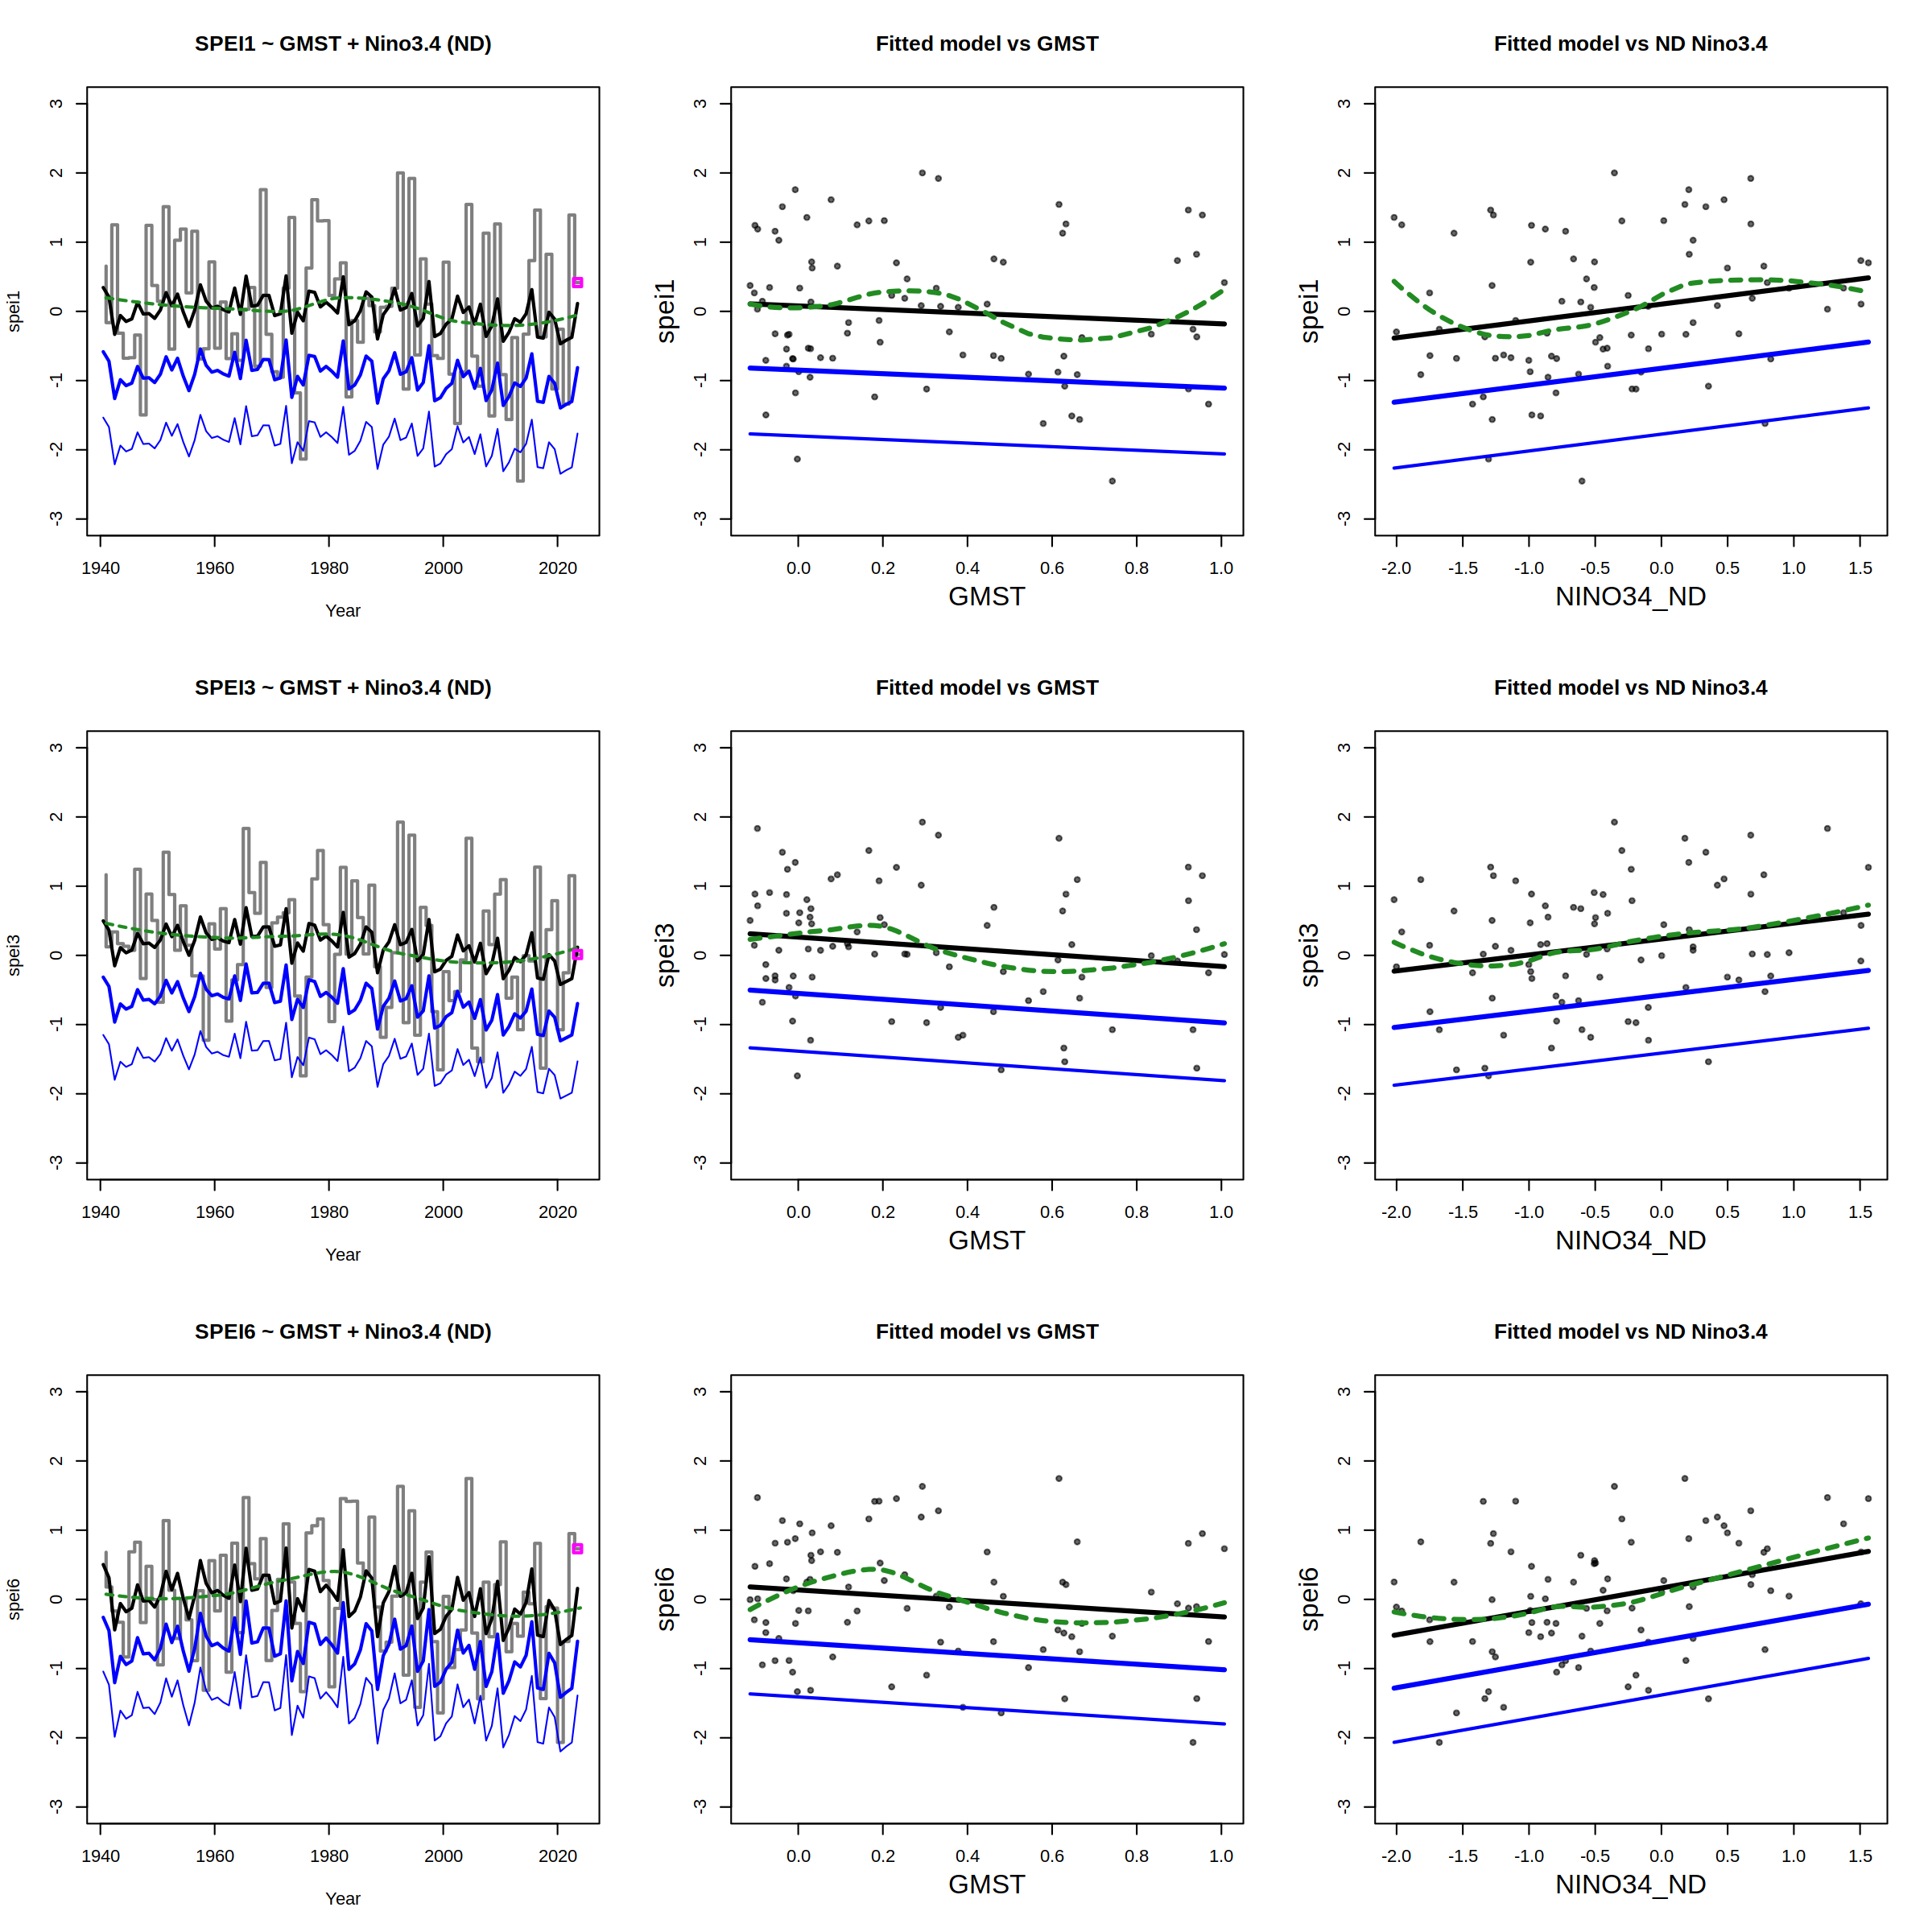

In [174]:
prep_window(c(3,3))
ylim = c(-3,3)

for (i in 1:3) {
    mdl <- mlist[[i]]
    plot_trend(mdl, add_loess = T, legend_pos = NA, ylim = ylim, main = paste0("SPEI",c(1,3,6)[i]," ~ GMST + Nino3.4 (ND)"))
    plot_covtrend(mdl, xcov = "gmst", add_loess = T, legend_pos = NA, ev_x = NA, ylim = ylim, main = "Fitted model vs GMST")
    plot_covtrend(mdl, xcov = "nino34_nd", add_loess = T, legend_pos = NA, ev_x = NA, ylim = ylim, main = "Fitted model vs ND Nino3.4")
}